<a href="https://colab.research.google.com/github/fpabi/ASE/blob/main/ASE_MORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import io
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from ipywidgets import interact

In [94]:
uploaded = files.upload()

Saving esp_vida_2020.csv to esp_vida_2020.csv


In [42]:
mort_ninguna = pd.read_csv(io.BytesIO(uploaded["mort_ninguna.csv"]), sep=',', decimal='.')
mort_ninguna.shape

(32, 4)

In [40]:
mort_IMSS = pd.read_csv(io.BytesIO(uploaded["mort_IMSS.csv"]), sep=',', decimal='.')
mort_IMSS.shape

(32, 4)

In [47]:
mort_ISSTE = pd.read_csv(io.BytesIO(uploaded["mort_ISSTE (1).csv"]), sep=',', decimal='.')
mort_ISSTE.shape

(32, 4)

In [50]:
mort_PEMEX = pd.read_csv(io.BytesIO(uploaded["mort_PEMEX.csv"]), sep=',', decimal='.')
mort_PEMEX.shape

(32, 4)

In [52]:
mort_SEDENA = pd.read_csv(io.BytesIO(uploaded["mort_SEDENA.csv"]), sep=',', decimal='.')
mort_SEDENA.shape

(32, 4)

In [54]:
mort_SEMAR = pd.read_csv(io.BytesIO(uploaded["mort_SEMAR.csv"]), sep=',', decimal='.')
mort_SEMAR.shape

(32, 4)

In [56]:
mort_SP_INSABI = pd.read_csv(io.BytesIO(uploaded["mort_SP_INSABI.csv"]), sep=',', decimal='.')
mort_SP_INSABI.shape

(32, 4)

In [58]:
mort_otra = pd.read_csv(io.BytesIO(uploaded["mort_otra.csv"]), sep=',', decimal='.')
mort_otra.shape

(32, 4)

In [21]:
mort_general = pd.read_csv(io.BytesIO(uploaded["mortalidad_general.csv"]), sep=',', decimal='.')
mort_general.shape

(32, 4)

In [38]:
pob_general = pd.read_csv(io.BytesIO(uploaded["poblacion_total (1).csv"]), sep=',', decimal='.')
pob_general.shape

(32, 4)

In [71]:
derechohabiencia_general = pd.read_csv(io.BytesIO(uploaded["Derechohabiencia.csv"]), sep=',', decimal='.')
derechohabiencia_general.shape

(33, 10)

In [91]:
esp_vida_2018 = pd.read_csv(io.BytesIO(uploaded["esp_vida_2018.csv"]), sep=',', decimal='.')
esp_vida_2018.shape

(33, 4)

In [93]:
esp_vida_2019 = pd.read_csv(io.BytesIO(uploaded["esp_vida_2019.csv"]), sep=',', decimal='.')
esp_vida_2019.shape

(33, 4)

In [ ]:
esp_vida_2020 = pd.read_csv(io.BytesIO(uploaded["esp_vida_2020.csv"]), sep=',', decimal='.')
esp_vida_2020.shape

In [3]:
pib=pd.read_csv(io.BytesIO(uploaded["PIBE.csv"]),sep=',',decimal='.')
pib.shape

(32, 19)

In [4]:
pib.head()

Estado      2003      2004      2005      2006      2007  \
0        Aguascalientes  12732.69  13553.99  14038.35  14410.94  15305.70   
1       Baja California  34912.12  36361.65  37740.98  38667.91  39028.14   
2   Baja California Sur   8869.76   9350.10   9701.29  10238.39  11007.40   
3              Campeche   7484.54   7944.35   8462.23   8799.84   9041.72   
4  Coahuila de Zaragoza  34445.55  35059.55  36144.93  36643.98  37477.70   

       2008      2009      2010      2011      2012      2013      2014  \
0  15833.29  13506.01  14368.22  15391.21  15359.84  16536.65  16961.21   
1  39007.36  34101.65  38799.12  42717.91  43653.96  45093.15  45634.01   
2  11599.79  10128.05  11771.82  13101.00  12891.28  12543.41  12865.22   
3   9379.37   7788.80   8881.82  10260.38  10245.98  10386.64  10495.18   
4  37855.73  32726.86  36654.80  38256.98  37478.98  38368.05  36836.08   

       2015      2016      2017      2018      2019      2020  
0  16876.46  18150.62  18337.10  17786.78  17317.48  16087.68  
1  50431.02  54521.91  56109.10  55753.02  57201.96  54791.87  
2  12953.06  14303.56  14462.46  15040.91  15624.71  14323.63  
3  11418.93  11193.30  11150.91  10924.12  10409.51   9737.03  
4  38138.11  41279.64  41198.24  41909.00  41702.45  38087.26

In [5]:
columnas_deseadas = ['Estado', '2018', '2019','2020']
# Selecciona solo las columnas deseadas del DataFrame
pib = pib[columnas_deseadas]
pib = pib.rename(columns={
    '2018': 'pib2018',
    '2019': 'pib2019',
    '2020': 'pib2020',
    'Estado':'Entidad'
})
pib

Entidad    pib2018    pib2019    pib2020
0                    Aguascalientes   17786.78   17317.48   16087.68
1                   Baja California   55753.02   57201.96   54791.87
2               Baja California Sur   15040.91   15624.71   14323.63
3                          Campeche   10924.12   10409.51    9737.03
4              Coahuila de Zaragoza   41909.00   41702.45   38087.26
5                            Colima   12841.65   12860.31   12427.06
6                           Chiapas   32106.05   33252.21   31684.44
7                         Chihuahua   50011.18   49160.44   46030.26
8                  Ciudad de México  259591.10  259694.19  220952.41
9                           Durango   17786.02   17902.30   16450.31
10                       Guanajuato   63815.43   64065.96   61963.34
11                         Guerrero   26521.97   26112.28   24516.81
12                          Hidalgo   30757.80   29930.08   26881.36
13                          Jalisco  125163.82  125323.78  116409.98
14                           México  204818.23  195185.23  181163.82
15              Michoacán de Ocampo   51326.65   50587.21   46166.13
16                          Morelos   20630.62   20494.21   19029.33
17                          Nayarit   13722.11   12961.43   12236.83
18                       Nuevo León  113968.47  119047.45  115821.45
19                           Oaxaca   27382.64   27950.65   26393.26
20                           Puebla   60147.63   58508.92   51376.58
21                        Querétaro   35982.78   33175.66   30716.92
22                     Quintana Roo   36720.43   37026.93   30739.81
23                  San Luis Potosí   30804.10   31785.25   29486.34
24                          Sinaloa   49343.58   45098.53   42405.93
25                           Sonora   47123.90   43882.11   41432.84
26                          Tabasco   28461.91   29805.29   25684.76
27                       Tamaulipas   51033.00   49699.28   47135.72
28                         Tlaxcala    8738.06    8963.92    8242.02
29  Veracruz de Ignacio de la Llave   80731.03   85078.79   77586.76
30                          Yucatán   35070.72   35090.81   30518.17
31                        Zacatecas   14246.06   14862.24   13803.99

In [16]:
for columna in pib.columns[1:]:
    print(f"\nColumna: {columna}")

    # Valores más altos
    top_3_altos = pib.nlargest(4, columna)[columna]
    print("Top 3 más altos:")
    print(top_3_altos)

    # Valores más bajos
    top_3_bajos = pib.nsmallest(4, columna)[columna]
    print("\nTop 3 más bajos:")
    print(top_3_bajos)


Columna: pib2018
Top 3 más altos:
8     259591.10
14    204818.23
13    125163.82
18    113968.47
Name: pib2018, dtype: float64

Top 3 más bajos:
28     8738.06
3     10924.12
5     12841.65
17    13722.11
Name: pib2018, dtype: float64

Columna: pib2019
Top 3 más altos:
8     259694.19
14    195185.23
13    125323.78
18    119047.45
Name: pib2019, dtype: float64

Top 3 más bajos:
28     8963.92
3     10409.51
5     12860.31
17    12961.43
Name: pib2019, dtype: float64

Columna: pib2020
Top 3 más altos:
8     220952.41
14    181163.82
13    116409.98
18    115821.45
Name: pib2020, dtype: float64

Top 3 más bajos:
28     8242.02
3      9737.03
17    12236.83
5     12427.06
Name: pib2020, dtype: float64


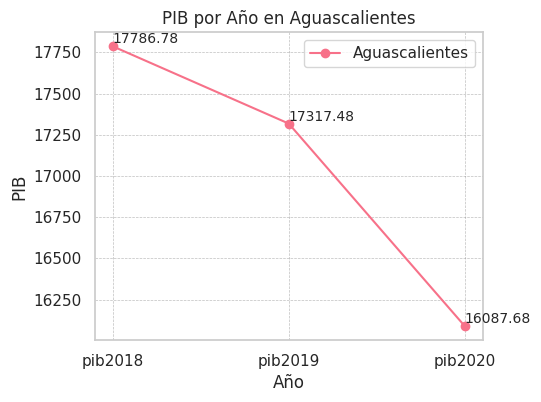

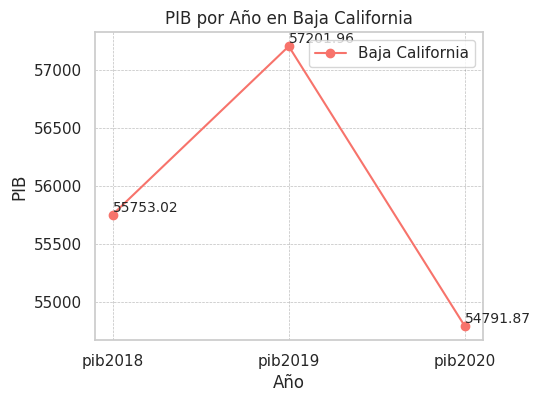

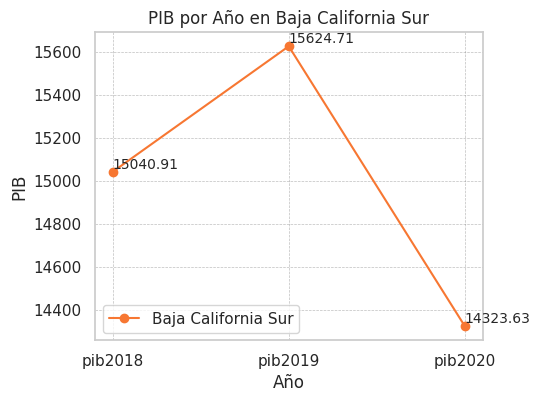

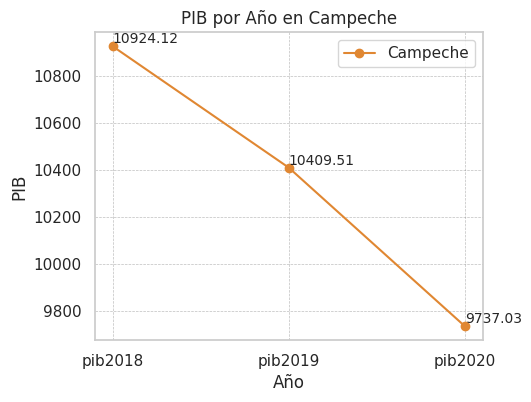

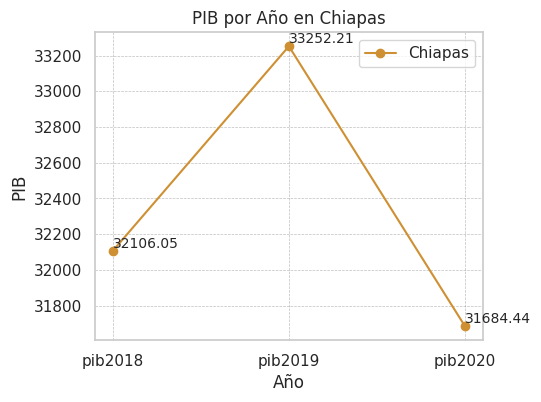

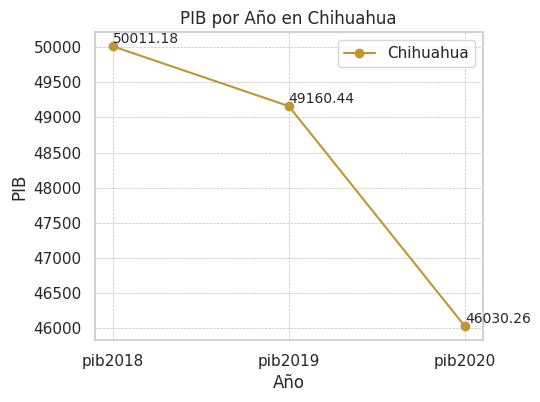

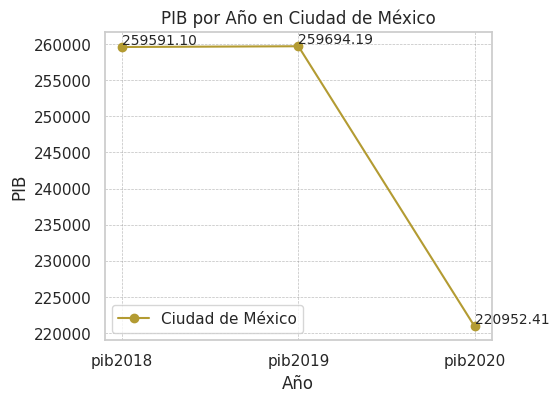

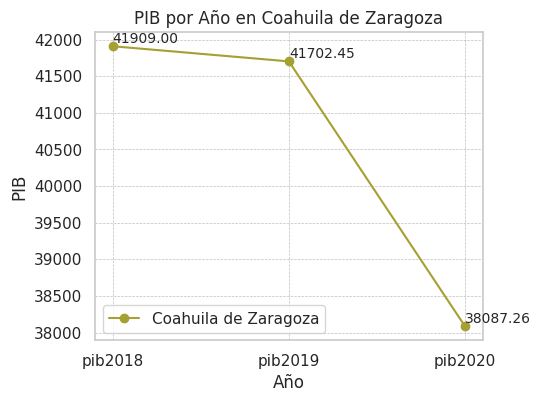

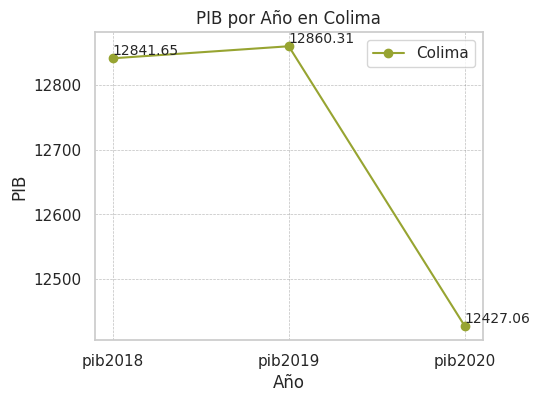

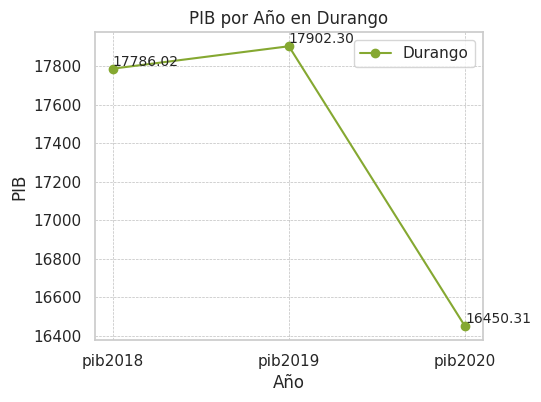

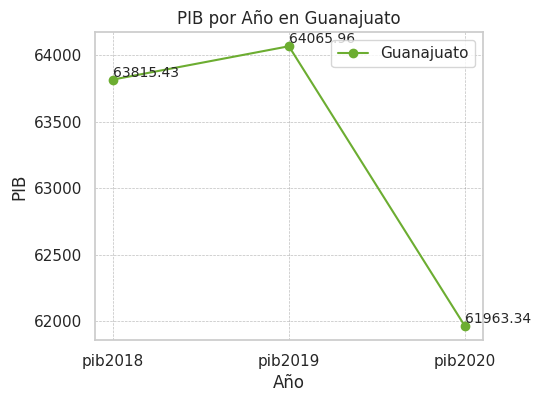

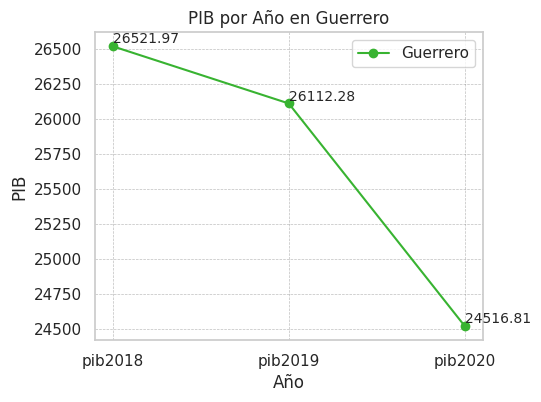

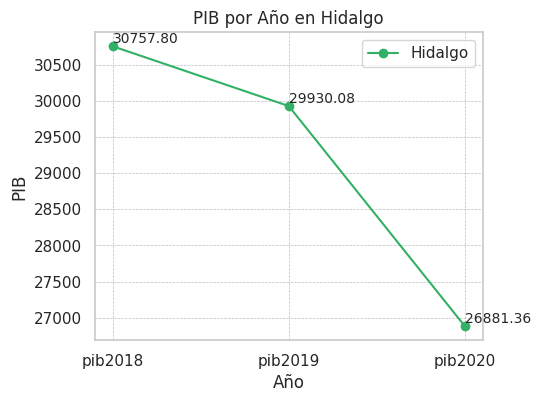

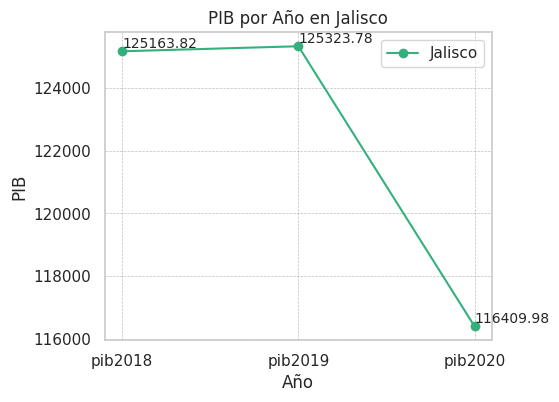

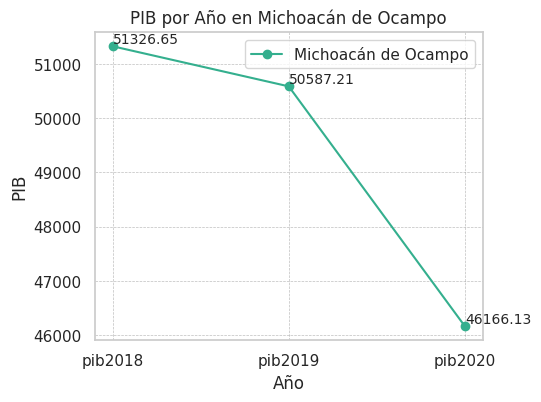

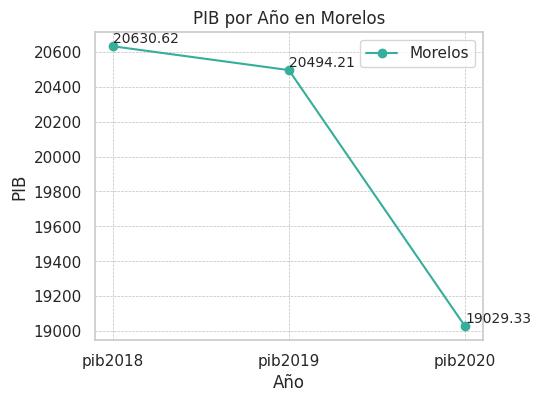

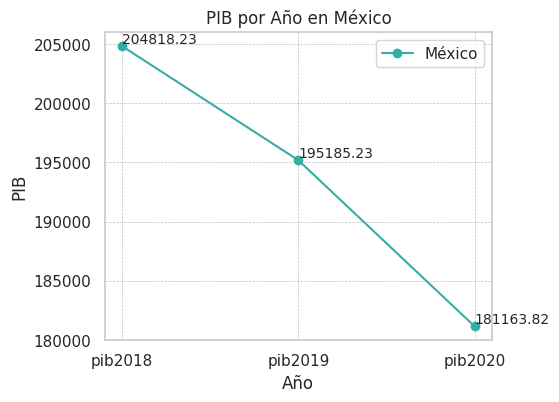

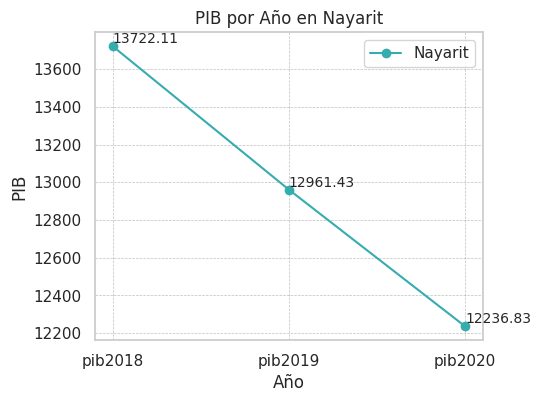

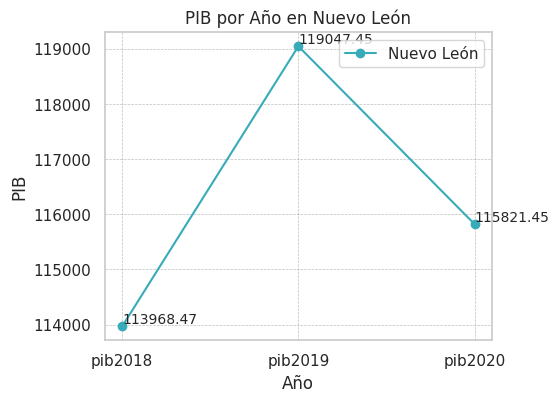

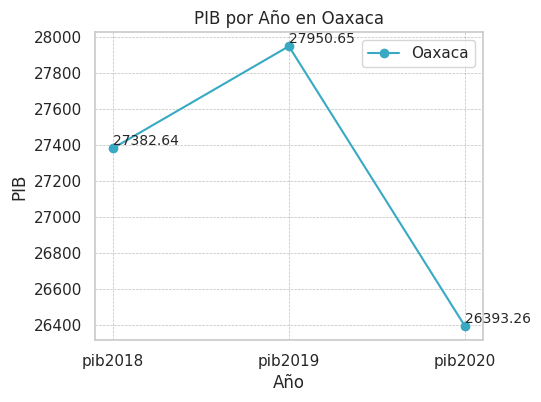

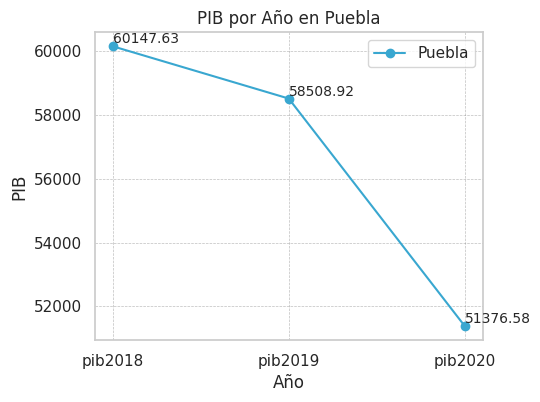

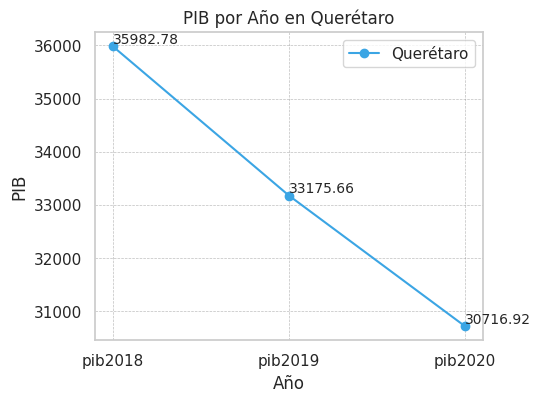

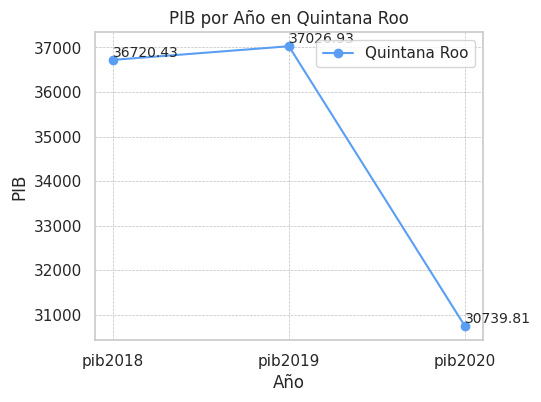

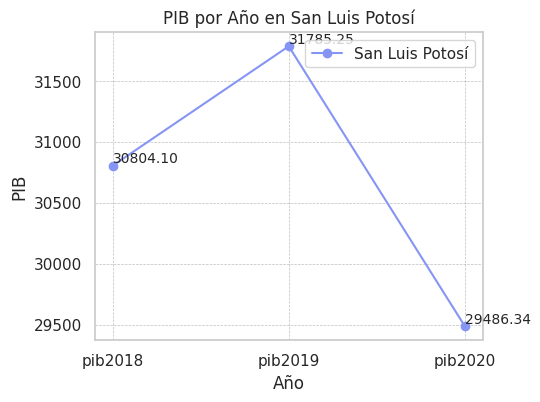

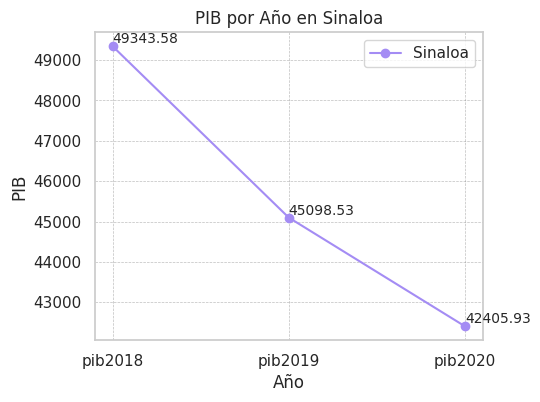

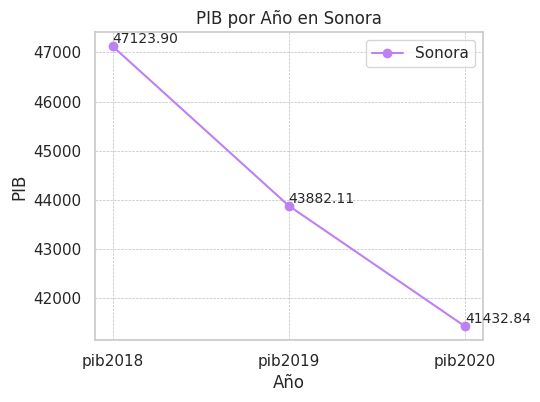

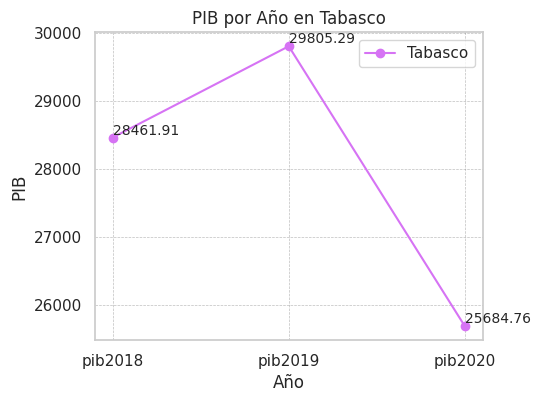

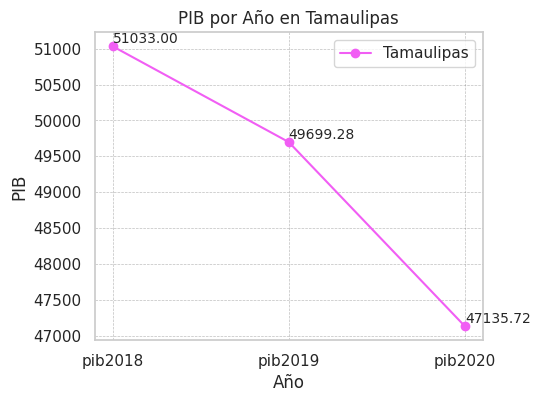

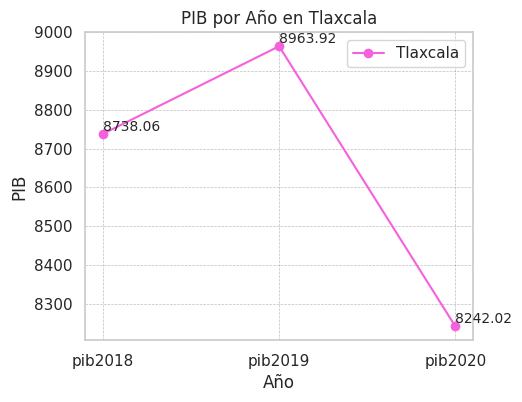

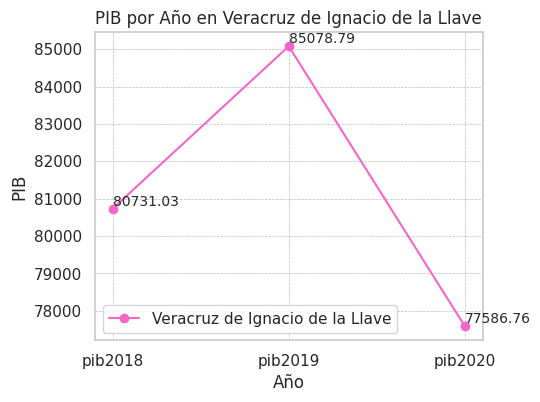

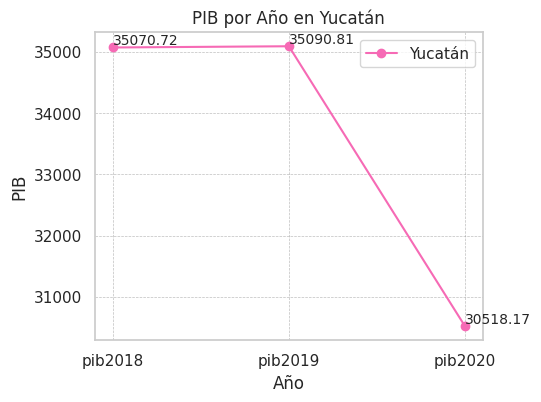

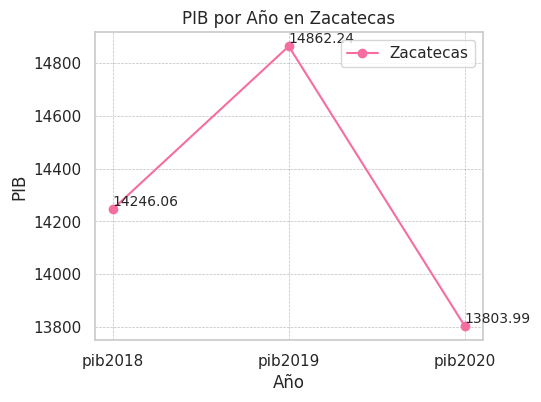

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

entidades_grouped = pib.groupby('Entidad')

colores = sns.color_palette('husl', n_colors=len(entidades_grouped))

for entidad, data_entidad in entidades_grouped:
    plt.figure(figsize=(5, 4))
    years = pib.columns[1:]
    plt.plot(years, data_entidad.iloc[:, 1:].values.flatten(), marker='o', label=entidad, color=colores.pop(0))

    for i, value in enumerate(data_entidad.iloc[:, 1:].values.flatten()):
        plt.text(years[i], value, f'{value:.2f}', ha='left', va='bottom', fontsize=10)

    plt.title(f'PIB por Año en {entidad}')
    plt.xlabel('Año')
    plt.ylabel('PIB')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    plt.show()


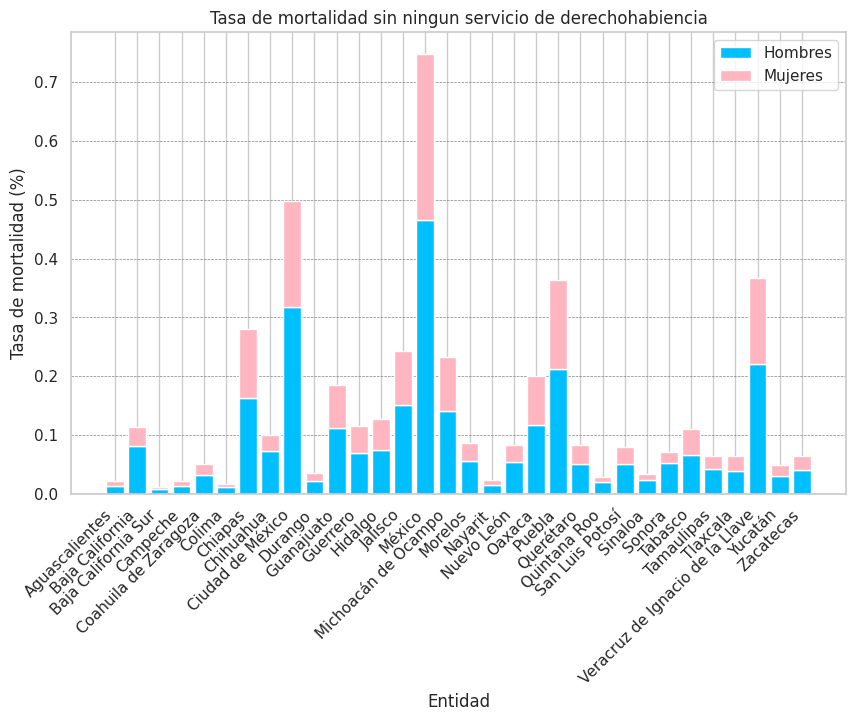

In [59]:
# Calcular la tasa de mortalidad por entidad
mort_ninguna['tasa_mortalidad_hombre'] = mort_ninguna['hombre'] / pob_general['hombre'].sum() * 1000
mort_ninguna['tasa_mortalidad_mujer'] = mort_ninguna['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

# Agregar cuadrícula
plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

# Cambiar los colores de las barras
plt.bar(mort_ninguna['entidad'], mort_ninguna['tasa_mortalidad_hombre'], label='Hombres', color='deepskyblue')
plt.bar(mort_ninguna['entidad'], mort_ninguna['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_ninguna['tasa_mortalidad_hombre'], color='lightpink')

# Otros ajustes
plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad sin ningun servicio de derechohabiencia')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()


In [79]:
mort_ninguna['ninguna'] = (mort_ninguna['hombre']+mort_ninguna['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000

In [80]:
mort_IMSS['IMSS'] = (mort_IMSS['hombre']+mort_IMSS['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000
mort_ISSTE['ISSTE'] = (mort_ISSTE['hombre']+mort_ISSTE['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000
mort_PEMEX['PEMEX'] = (mort_PEMEX['hombre']+mort_PEMEX['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000
mort_SEDENA['SEDENA'] = (mort_SEDENA['hombre']+mort_SEDENA['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000
mort_SEMAR['SEMAR'] = (mort_SEMAR['hombre']+mort_SEMAR['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000
mort_SP_INSABI['SP_INSABI'] = (mort_SP_INSABI['hombre']+mort_SP_INSABI['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000

In [81]:
mort_otra['OTRA'] = (mort_otra['hombre']+mort_otra['mujer']) / (pob_general['hombre']+pob_general['mujer']).sum() * 1000

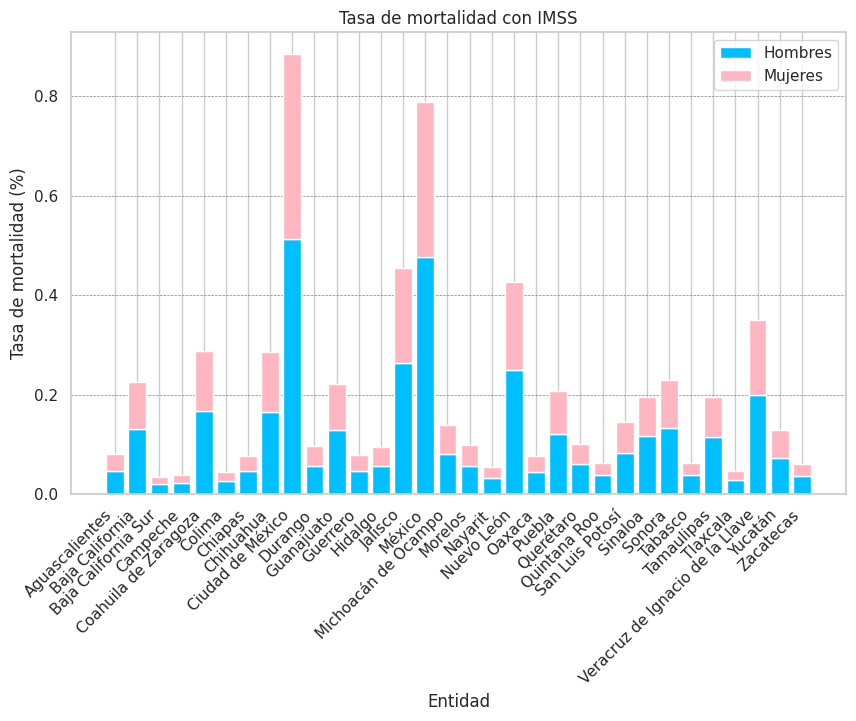

In [60]:
# Calcular la tasa de mortalidad por entidad
mort_IMSS['tasa_mortalidad_hombre'] = mort_IMSS['hombre'] / pob_general['hombre'].sum() * 1000
mort_IMSS['tasa_mortalidad_mujer'] = mort_IMSS['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.bar(mort_ninguna['entidad'], mort_IMSS['tasa_mortalidad_hombre'], label='Hombres', color='deepskyblue')
plt.bar(mort_ninguna['entidad'], mort_IMSS['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_IMSS['tasa_mortalidad_hombre'],color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con IMSS')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

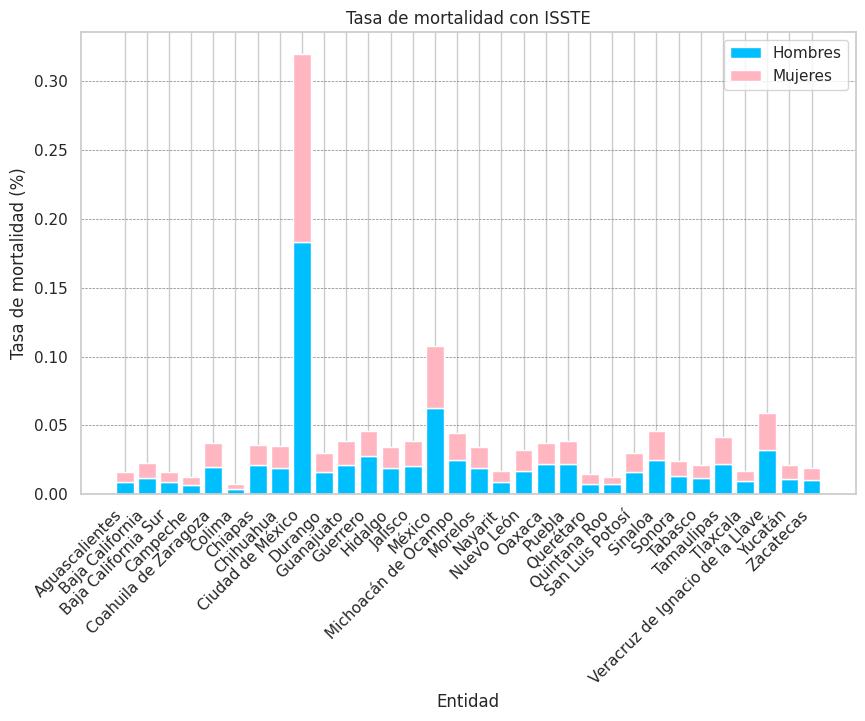

In [61]:
# Calcular la tasa de mortalidad por entidad
mort_ISSTE['tasa_mortalidad_hombre'] = mort_ISSTE['hombre'] / pob_general['hombre'].sum() * 1000
mort_ISSTE['tasa_mortalidad_mujer'] = mort_ISSTE['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.bar(mort_ISSTE['entidad'], mort_ISSTE['tasa_mortalidad_hombre'], label='Hombres',color='deepskyblue')
plt.bar(mort_ISSTE['entidad'], mort_ISSTE['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_ISSTE['tasa_mortalidad_hombre'],color='lightpink')

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con ISSTE')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

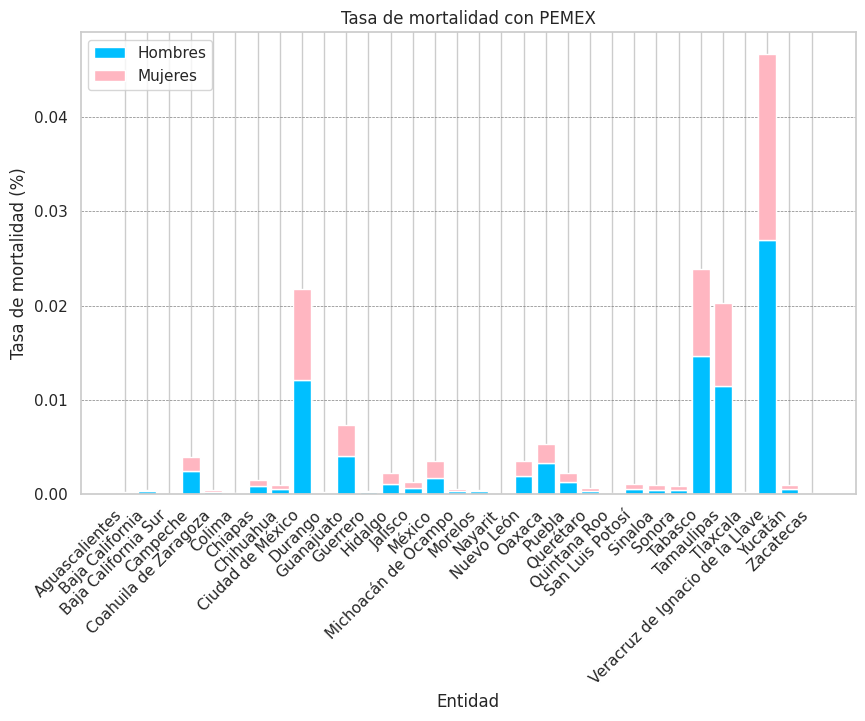

In [62]:
# Calcular la tasa de mortalidad por entidad
mort_PEMEX['tasa_mortalidad_hombre'] = mort_PEMEX['hombre'] / pob_general['hombre'].sum() * 1000
mort_PEMEX['tasa_mortalidad_mujer'] = mort_PEMEX['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.bar(mort_PEMEX['entidad'], mort_PEMEX['tasa_mortalidad_hombre'], label='Hombres', color='deepskyblue')
plt.bar(mort_PEMEX['entidad'], mort_PEMEX['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_PEMEX['tasa_mortalidad_hombre'], color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con PEMEX')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

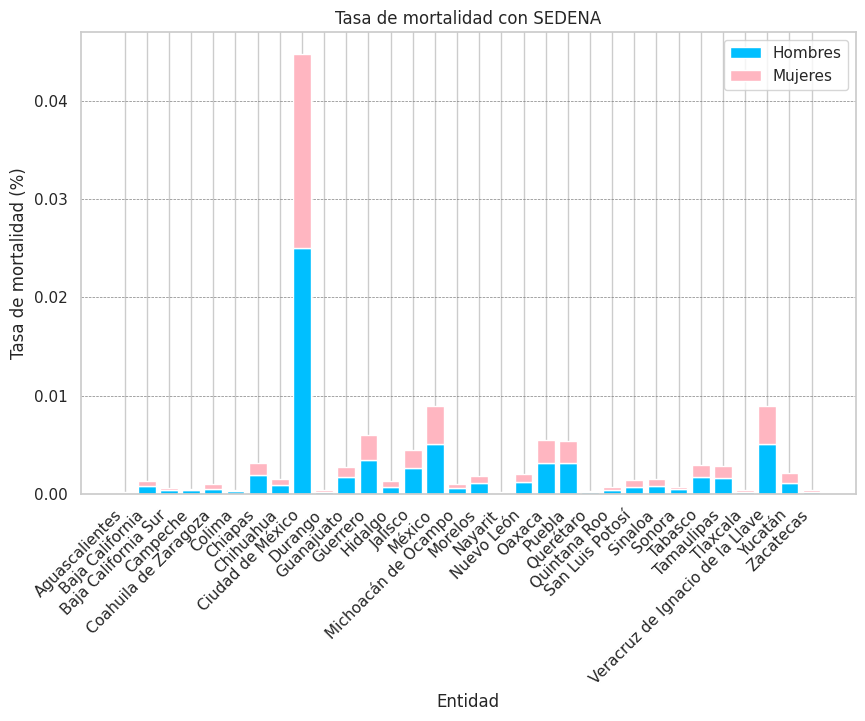

In [63]:
# Calcular la tasa de mortalidad por entidad
mort_SEDENA['tasa_mortalidad_hombre'] = mort_SEDENA['hombre'] / pob_general['hombre'].sum() * 1000
mort_SEDENA['tasa_mortalidad_mujer'] = mort_SEDENA['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.bar(mort_SEDENA['entidad'], mort_SEDENA['tasa_mortalidad_hombre'], label='Hombres', color='deepskyblue')
plt.bar(mort_SEDENA['entidad'], mort_SEDENA['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_SEDENA['tasa_mortalidad_hombre'], color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con SEDENA')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

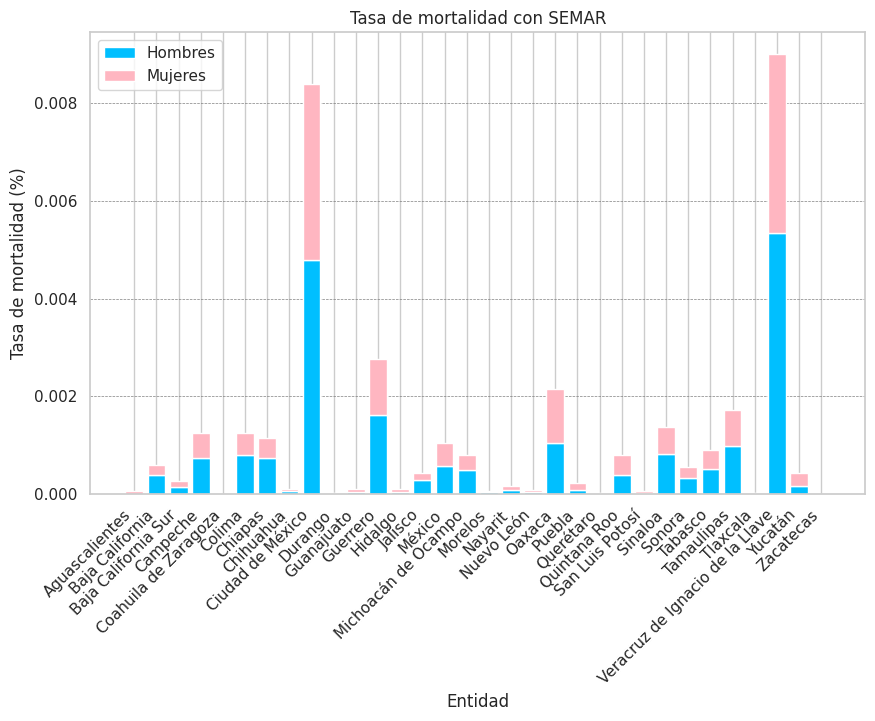

In [64]:
# Calcular la tasa de mortalidad por entidad
mort_SEMAR['tasa_mortalidad_hombre'] = mort_SEMAR['hombre'] / pob_general['hombre'].sum() * 1000
mort_SEMAR['tasa_mortalidad_mujer'] = mort_SEMAR['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

plt.bar(mort_SEMAR['entidad'], mort_SEMAR['tasa_mortalidad_hombre'], label='Hombres', color='deepskyblue')
plt.bar(mort_SEMAR['entidad'], mort_SEMAR['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_SEMAR['tasa_mortalidad_hombre'], color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con SEMAR')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

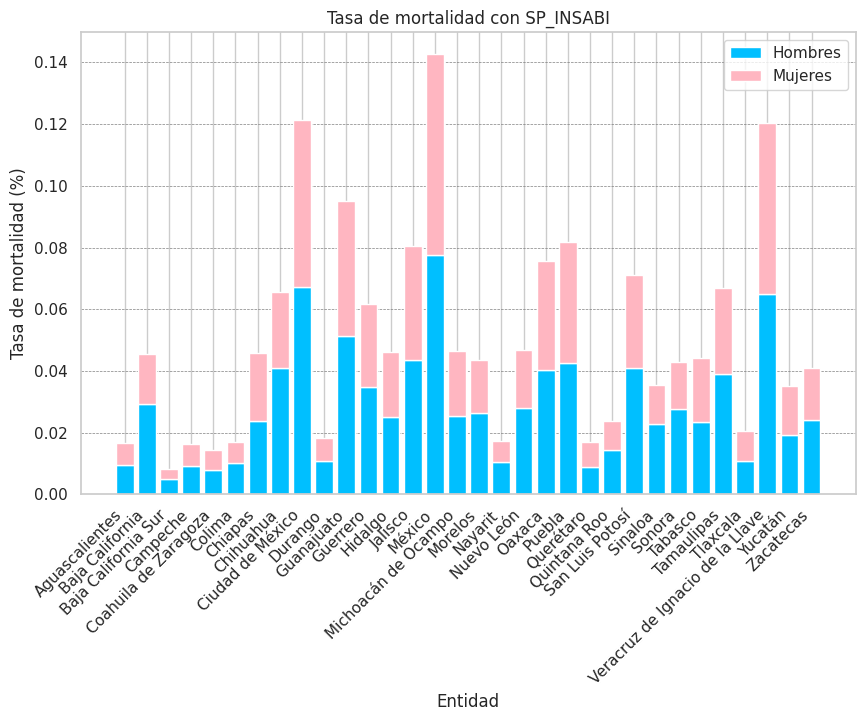

In [65]:
# Calcular la tasa de mortalidad por entidad
mort_SP_INSABI['tasa_mortalidad_hombre'] = mort_SP_INSABI['hombre'] / pob_general['hombre'].sum() * 1000
mort_SP_INSABI['tasa_mortalidad_mujer'] = mort_SP_INSABI['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')

bar1 = plt.bar(mort_SP_INSABI['entidad'], mort_SP_INSABI['tasa_mortalidad_hombre'], label='Hombres', color='deepskyblue')
bar2 = plt.bar(mort_SP_INSABI['entidad'], mort_SP_INSABI['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_SP_INSABI['tasa_mortalidad_hombre'], color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con SP_INSABI')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

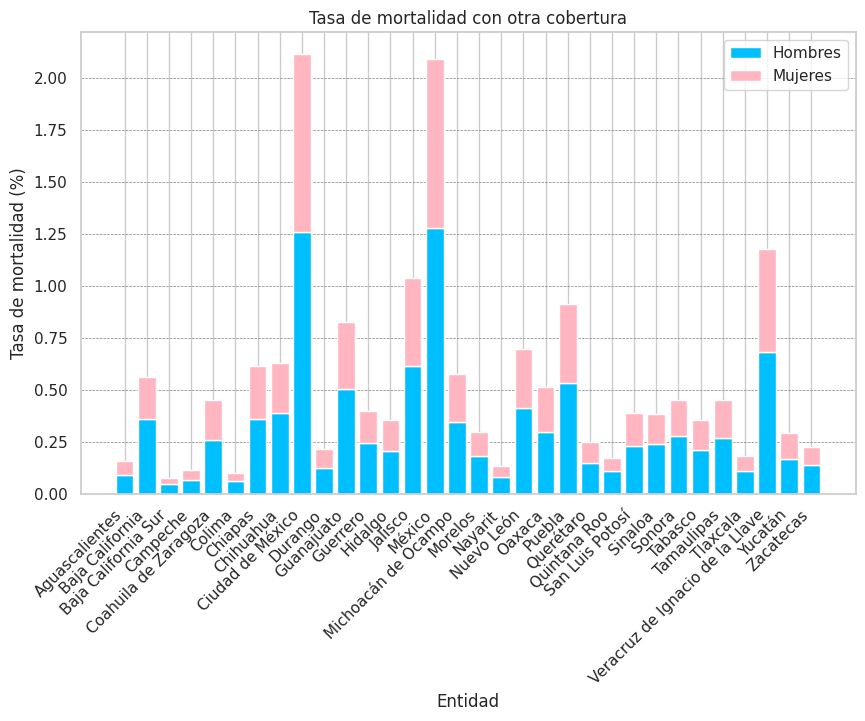

In [66]:
# Calcular la tasa de mortalidad por entidad
mort_otra['tasa_mortalidad_hombre_otra'] = mort_otra['hombre'] / pob_general['hombre'].sum() * 1000
mort_otra['tasa_mortalidad_mujer_otra'] = mort_otra['mujer'] / pob_general['mujer'].sum() * 1000

# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')


plt.bar(mort_general['entidad'], mort_general['tasa_mortalidad_hombre'], label='Hombres',color='deepskyblue')
plt.bar(mort_general['entidad'], mort_general['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_general['tasa_mortalidad_hombre'], color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad con otra cobertura')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

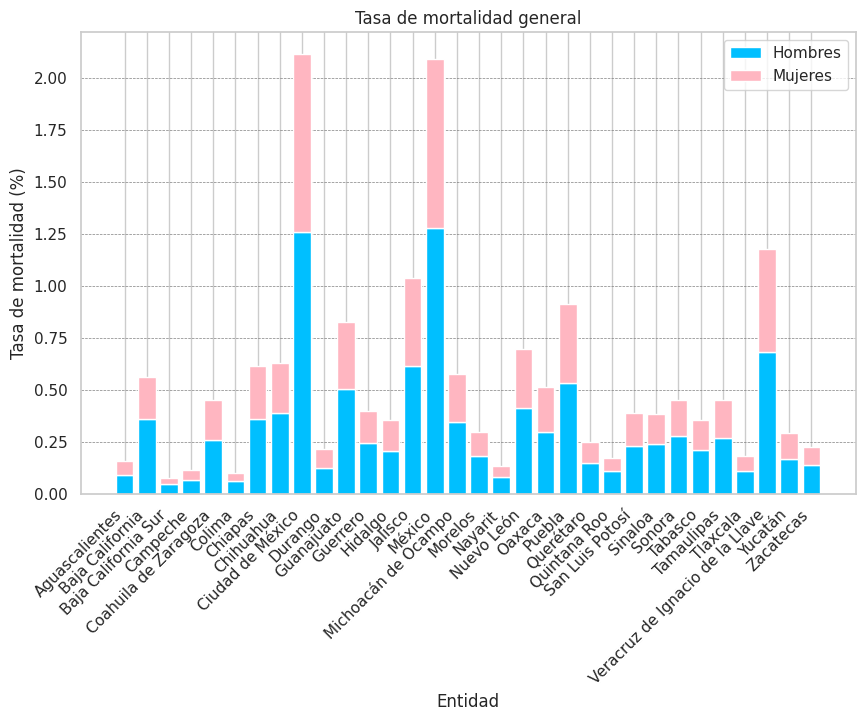

In [25]:
# Calcular la tasa de mortalidad por entidad
mort_general['tasa_mortalidad_hombre'] = mort_general['hombre'] / pob_general['hombre'].sum() * 1000
mort_general['tasa_mortalidad_mujer'] = mort_general['mujer'] / pob_general['mujer'].sum() * 1000


# Graficar las tasas de mortalidad por entidad
plt.figure(figsize=(10, 6))

plt.grid(which='major', axis='y', linestyle='--', linewidth=0.5, color='gray')


plt.bar(mort_general['entidad'], mort_general['tasa_mortalidad_hombre'], label='Hombres',color='deepskyblue')
plt.bar(mort_general['entidad'], mort_general['tasa_mortalidad_mujer'], label='Mujeres', bottom=mort_general['tasa_mortalidad_hombre'], color='lightpink')

plt.xlabel('Entidad')
plt.ylabel('Tasa de mortalidad (%)')
plt.title('Tasa de mortalidad general')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

In [75]:
mort_general.head()

clave_ent               entidad  hombre  mujer  tasa_mortalidad_hombre  \
0          1        Aguascalientes    5803   4163                0.094399   
1          2       Baja California   22328  12777                0.363214   
2          3   Baja California Sur    2965   1947                0.048232   
3          4              Campeche    4342   3030                0.070632   
4          5  Coahuila de Zaragoza   16105  12178                0.261983   

   tasa_mortalidad_mujer  mortalidad_general  
0               0.064502            0.079086  
1               0.197968            0.278580  
2               0.030167            0.038980  
3               0.046947            0.058501  
4               0.188687            0.224443

In [73]:
mort_general['mortalidad_general'] = (mort_general['hombre'] + mort_general['mujer'])/(pob_general['hombre']+pob_general['mujer']).sum() * 1000

# Mostrar el DataFrame con la nueva columna
mort_general.head()

clave_ent               entidad  hombre  mujer  tasa_mortalidad_hombre  \
0          1        Aguascalientes    5803   4163                0.094399   
1          2       Baja California   22328  12777                0.363214   
2          3   Baja California Sur    2965   1947                0.048232   
3          4              Campeche    4342   3030                0.070632   
4          5  Coahuila de Zaragoza   16105  12178                0.261983   

   tasa_mortalidad_mujer  mortalidad_general  
0               0.064502            0.079086  
1               0.197968            0.278580  
2               0.030167            0.038980  
3               0.046947            0.058501  
4               0.188687            0.224443

In [76]:
tasas=pd.concat([mort_general,mort_IMSS,mort_ISSTE,mort_PEMEX,mort_SEDENA,mort_SEMAR,mort_SP_INSABI,mort_ninguna,mort_otra], axis=1)
tasas

clave_ent                          entidad hombre  mujer  \
0           1                   Aguascalientes   5803   4163   
1           2                  Baja California  22328  12777   
2           3              Baja California Sur   2965   1947   
3           4                         Campeche   4342   3030   
4           5             Coahuila de Zaragoza  16105  12178   
5           6                           Colima   3921   2473   
6           7                          Chiapas  22235  16324   
7           8                        Chihuahua  24022  15599   
8           9                 Ciudad de México  77311  55172   
9          10                          Durango   7757   5739   
10         11                       Guanajuato  31001  20898   
11         12                         Guerrero  15026  10135   
12         13                          Hidalgo  12851   9448   
13         14                          Jalisco  37960  27163   
14         15                           México  78686  52377   
15         16              Michoacán de Ocampo  21279  14991   
16         17                          Morelos  11159   7545   
17         18                          Nayarit   5054   3476   
18         19                       Nuevo León  25480  18138   
19         20                           Oaxaca  18437  14004   
20         21                           Puebla  32754  24641   
21         22                        Querétaro   9110   6497   
22         23                     Quintana Roo   6944   4020   
23         24                  San Luis Potosí  14130  10331   
24         25                          Sinaloa  14708   9545   
25         26                           Sonora  17301  11086   
26         27                          Tabasco  13074   9262   
27         28                       Tamaulipas  16729  11789   
28         29                         Tlaxcala   6793   4765   
29         30  Veracruz de Ignacio de la Llave  41915  31860   
30         31                          Yucatán  10528   8043   
31         32                        Zacatecas   8502   5787   

    tasa_mortalidad_hombre  tasa_mortalidad_mujer  mortalidad_general  \
0                 0.094399               0.064502            0.079086   
1                 0.363214               0.197968            0.278580   
2                 0.048232               0.030167            0.038980   
3                 0.070632               0.046947            0.058501   
4                 0.261983               0.188687            0.224443   
5                 0.063784               0.038317            0.050740   
6                 0.361701               0.252926            0.305990   
7                 0.390771               0.241693            0.314417   
8                 1.257634               0.854841            1.051335   
9                 0.126185               0.088921            0.107099   
10                0.504300               0.323796            0.411851   
11                0.244431               0.157033            0.199668   
12                0.209050               0.146388            0.176956   
13                0.617503               0.420867            0.516792   
14                1.280001               0.811535            1.040067   
15                0.346150               0.232272            0.287825   
16                0.181526               0.116903            0.148428   
17                0.082214               0.053858            0.067691   
18                0.414488               0.281032            0.346136   
19                0.299918               0.216980            0.257440   
20                0.532816               0.381790            0.455465   
21                0.148194               0.100665            0.123851   
22                0.112959               0.062286            0.087006   
23                0.229856               0.160070            0.194113   
24                0.239258               0.147891            0.192

In [84]:
columnas = ['mortalidad_general', 'IMSS', 'ISSTE', 'PEMEX', 'SEDENA','SEMAR','SP_INSABI' ,'OTRA','ninguna']

In [85]:
tasas = tasas[columnas]

In [86]:
tasas.head()

mortalidad_general      IMSS     ISSTE     PEMEX    SEDENA     SEMAR  \
0            0.079086  0.039972  0.007967  0.000143  0.000127  0.000032   
1            0.278580  0.112178  0.011213  0.000246  0.000675  0.000294   
2            0.038980  0.017070  0.007991  0.000016  0.000333  0.000135   
3            0.058501  0.019157  0.006095  0.001944  0.000286  0.000627   
4            0.224443  0.143778  0.018490  0.000246  0.000516  0.000008   

   SP_INSABI      OTRA   ninguna  
0   0.008340  0.000746  0.010983  
1   0.022640  0.016022  0.056668  
2   0.004007  0.000246  0.005888  
3   0.008078  0.001413  0.010872  
4   0.007198  0.002897  0.025219

In [87]:
tasas['Entidad'] = derechohabiencia_general['entidad']

<ipython-input-87-ed2b84ff04d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tasas['Entidad'] = derechohabiencia_general['entidad']


In [88]:
tasas.head()

mortalidad_general      IMSS     ISSTE     PEMEX    SEDENA     SEMAR  \
0            0.079086  0.039972  0.007967  0.000143  0.000127  0.000032   
1            0.278580  0.112178  0.011213  0.000246  0.000675  0.000294   
2            0.038980  0.017070  0.007991  0.000016  0.000333  0.000135   
3            0.058501  0.019157  0.006095  0.001944  0.000286  0.000627   
4            0.224443  0.143778  0.018490  0.000246  0.000516  0.000008   

   SP_INSABI      OTRA   ninguna                   Entidad  
0   0.008340  0.000746  0.010983  Estados Unidos Mexicanos  
1   0.022640  0.016022  0.056668            Aguascalientes  
2   0.004007  0.000246  0.005888           Baja California  
3   0.008078  0.001413  0.010872       Baja California Sur  
4   0.007198  0.002897  0.025219                  Campeche

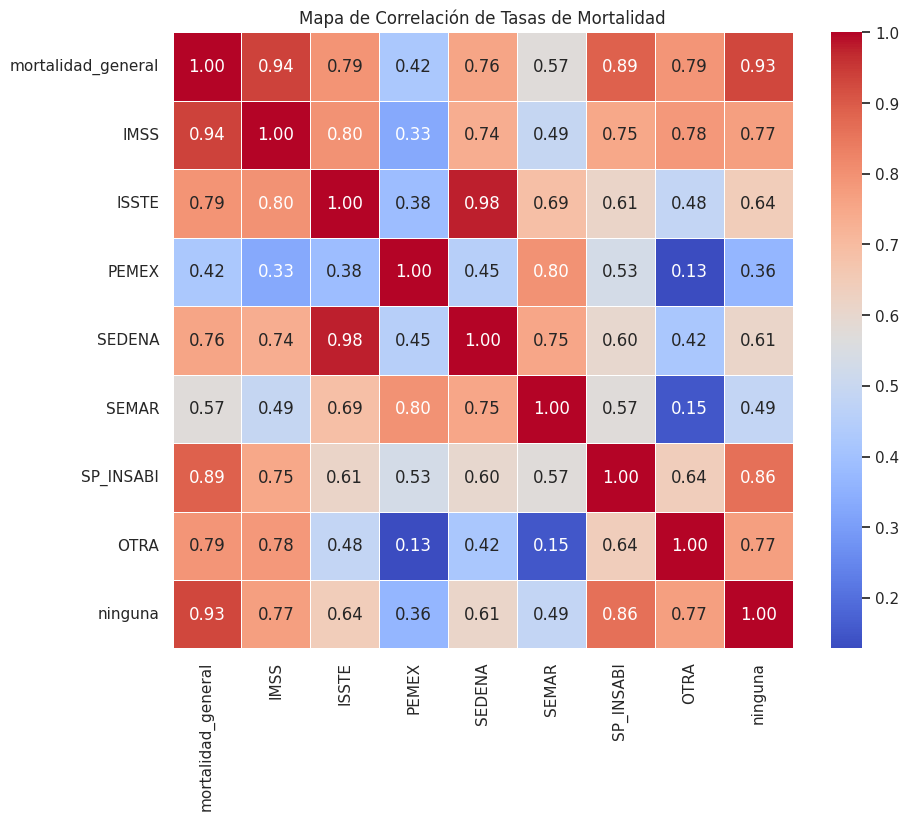

In [89]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
columnas_numericas = tasas.select_dtypes(include=['float64', 'int64']).columns
matriz_correlacion = tasas[columnas_numericas].corr()

# Crear un mapa de calor con seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Configuración del gráfico
plt.title('Mapa de Correlación de Tasas de Mortalidad')
plt.show()

In [ ]:
esp_vida_2018.head()

entidad  total  hombres  mujeres
0  Estados Unidos Mexicanos   74.9     71.8     78.0
1            Aguascalientes   76.6     73.5     79.7
2           Baja California   76.2     73.3     79.3
3       Baja California Sur   76.8     73.9     80.0
4                  Campeche   74.1     71.0     77.4

In [ ]:
esp_vida_2018 = esp_vida_2018.rename(columns={
    'total': 'Total2018',
    'hombres': 'Hombres2018',
    'mujeres': 'Mujeres2018','entidad':'Entidad'
})

In [ ]:
esp_vida_2019 = esp_vida_2019.rename(columns={
    'Total': 'Total2019',
    'Hombres': 'Hombres2019',
    'Mujeres': 'Mujeres2019'
})

In [ ]:
esp_vida_2020 = esp_vida_2020.rename(columns={
    'Total': 'Total2020',
    'Hombres': 'Hombres2020',
    'Mujeres': 'Mujeres2020'
})

In [ ]:
esperanzas=pd.concat([esp_vida_2018, esp_vida_2019,esp_vida_2020], axis=1)
esperanzas

Entidad  Total2018  Hombres2018  Mujeres2018  \
0          Estados Unidos Mexicanos       74.9         71.8         78.0   
1                    Aguascalientes       76.6         73.5         79.7   
2                   Baja California       76.2         73.3         79.3   
3               Baja California Sur       76.8         73.9         80.0   
4                          Campeche       74.1         71.0         77.4   
5              Coahuila de Zaragoza       76.8         73.8         79.9   
6                            Colima       75.8         72.8         79.0   
7                           Chiapas       72.6         69.4         75.8   
8                         Chihuahua       76.3         73.3         79.4   
9                  Ciudad de México       76.6         73.5         79.6   
10                          Durango       75.2         72.1         78.3   
11                       Guanajuato       74.6         71.4         77.7   
12                         Guerrero       72.8         69.5         76.0   
13                          Hidalgo       73.6         70.4         76.7   
14                          Jalisco       75.7         72.6         78.8   
15                           México       74.8         71.7         77.9   
16              Michoacán de Ocampo       73.8         70.6         77.0   
17                          Morelos       74.0         70.8         77.2   
18                          Nayarit       75.2         72.1         78.4   
19                       Nuevo León       77.4         74.5         80.5   
20                           Oaxaca       73.0         69.7         76.2   
21                           Puebla       73.6         70.4         76.7   
22                        Querétaro       76.0         72.9         79.0   
23                     Quintana Roo       75.6         72.7         78.8   
24                  San Luis Potosí       74.9         71.8         78.1   
25                          Sinaloa       75.8         72.7         78.9   
26                           Sonora       76.4         73.5         79.5   
27                          Tabasco       73.4         70.2         76.6   
28                       Tamaulipas       75.5         72.5         78.7   
29                         Tlaxcala       73.9         70.7         77.1   
30  Veracruz de Ignacio de la Llave       73.4         70.1         76.5   
31                          Yucatán       74.6         71.5         77.8   
32                        Zacatecas       74.0         70.8         77.2   

                            entidad  Total2019  Hombres2019  Mujeres2019  \
0          Estados Unidos Mexicanos       74.8         71.8         78.0   
1                    Aguascalientes       76.5         73.4         79.6   
2                   Baja California       76.1         73.1         79.3   
3               Baja California Sur       76.7         73.8         79.9   
4                          Campeche       74.1         70.9         77.3   
5              Coahuila de Zaragoza       76.7         73.7         79.8   
6                            Colima       75.7         72.6         79.0   
7                           Chiapas       72.6         69.3         75.8   
8                         Chihuahua       76.2         73.2         79.4   
9                  Ciudad de México       76.5         73.4         79.6   
10                          Durango       75.1         72.0         78.3   
11                       Guanajuato       74.6         71.4         77.7   
12                         Guerrero       72.8         69.4         76.0   
13                          Hidalgo       73.5         70.3         76.7   
14                          Jalisco       75.6         72.5         78.8   
15                           México       74.7         71.6         77.9   
16              Michoacán de Ocampo       73.8         70.5         77.0   
17                          Morelos       74.0         70.8         77.2   

In [ ]:
esperanzas = esperanzas.drop('entidad', axis=1)

In [ ]:
esperanzas

Entidad  Total2018  Hombres2018  Mujeres2018  \
0          Estados Unidos Mexicanos       74.9         71.8         78.0   
1                    Aguascalientes       76.6         73.5         79.7   
2                   Baja California       76.2         73.3         79.3   
3               Baja California Sur       76.8         73.9         80.0   
4                          Campeche       74.1         71.0         77.4   
5              Coahuila de Zaragoza       76.8         73.8         79.9   
6                            Colima       75.8         72.8         79.0   
7                           Chiapas       72.6         69.4         75.8   
8                         Chihuahua       76.3         73.3         79.4   
9                  Ciudad de México       76.6         73.5         79.6   
10                          Durango       75.2         72.1         78.3   
11                       Guanajuato       74.6         71.4         77.7   
12                         Guerrero       72.8         69.5         76.0   
13                          Hidalgo       73.6         70.4         76.7   
14                          Jalisco       75.7         72.6         78.8   
15                           México       74.8         71.7         77.9   
16              Michoacán de Ocampo       73.8         70.6         77.0   
17                          Morelos       74.0         70.8         77.2   
18                          Nayarit       75.2         72.1         78.4   
19                       Nuevo León       77.4         74.5         80.5   
20                           Oaxaca       73.0         69.7         76.2   
21                           Puebla       73.6         70.4         76.7   
22                        Querétaro       76.0         72.9         79.0   
23                     Quintana Roo       75.6         72.7         78.8   
24                  San Luis Potosí       74.9         71.8         78.1   
25                          Sinaloa       75.8         72.7         78.9   
26                           Sonora       76.4         73.5         79.5   
27                          Tabasco       73.4         70.2         76.6   
28                       Tamaulipas       75.5         72.5         78.7   
29                         Tlaxcala       73.9         70.7         77.1   
30  Veracruz de Ignacio de la Llave       73.4         70.1         76.5   
31                          Yucatán       74.6         71.5         77.8   
32                        Zacatecas       74.0         70.8         77.2   

    Total2019  Hombres2019  Mujeres2019  Total2020  Hombres2020  Mujeres2020  
0        74.8         71.8         78.0       68.9         64.8         73.5  
1        76.5         73.4         79.6       70.1         65.7         75.2  
2        76.1         73.1         79.3       68.9         65.6         72.6  
3        76.7         73.8         79.9       72.5         69.7         75.6  
4        74.1         70.9         77.3       68.0         64.3         72.1  
5        76.7         73.7         79.8       69.9         66.0         74.2  
6        75.7         72.6         79.0       72.1         69.1         75.5  
7        72.6         69.3         75.8       67.9         63.8         72.6  
8        76.2         73.2         79.4       69.5         65.7         73.9  
9        76.5         73.4         79.6       69.2         64.5         74.6  
10       75.1         72.0         78.3       69.8         66.1         74.0  
11       74.6         71.4         77.7       68.3         64.1         73.1  
12       72.8         69.4         76.0       69.1         65.3         73.3  
13       73.5         70.3         76.7       68.2         63.9         73.0  
14       75.6         72.5         78.8       71.2         67.6         75.3  
15       74.7         71.6         77.9       66.7         62.0         72.0  
16       73.8         70.5         77.0       69.4         65.7         73.5  
17       74.0        

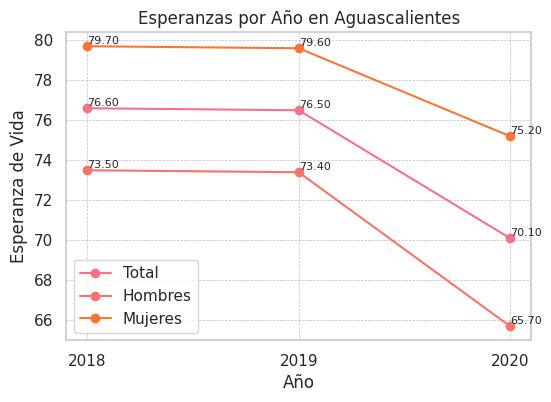

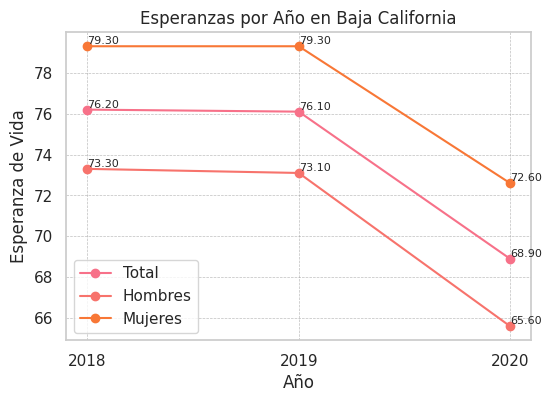

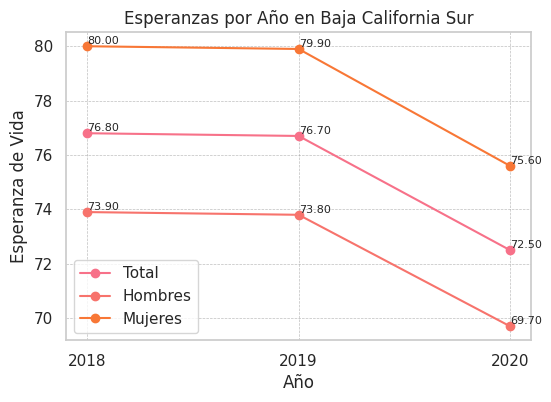

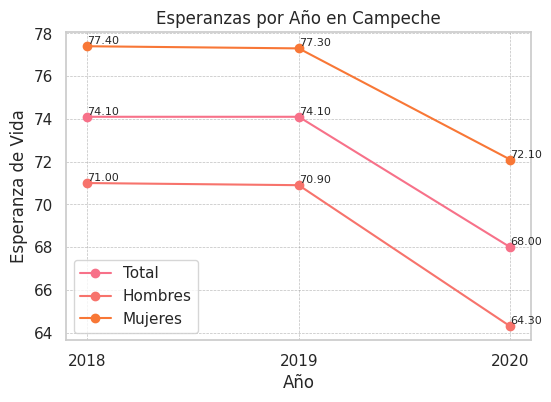

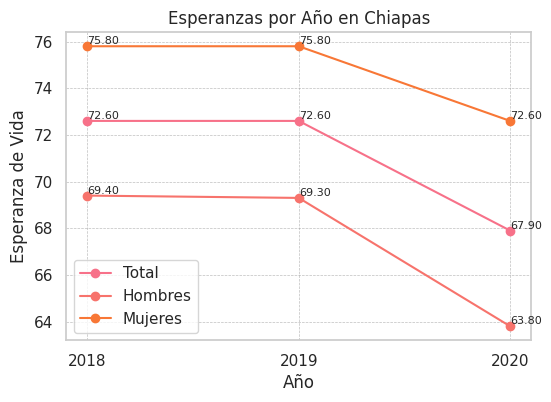

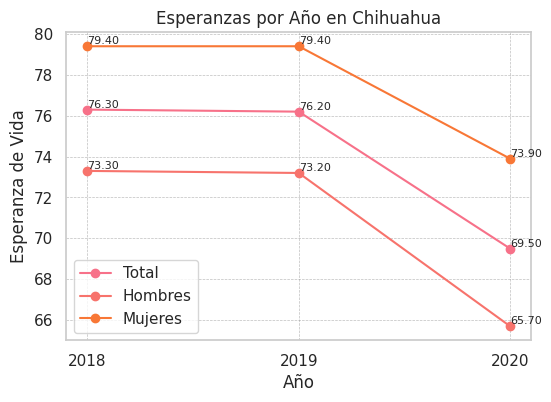

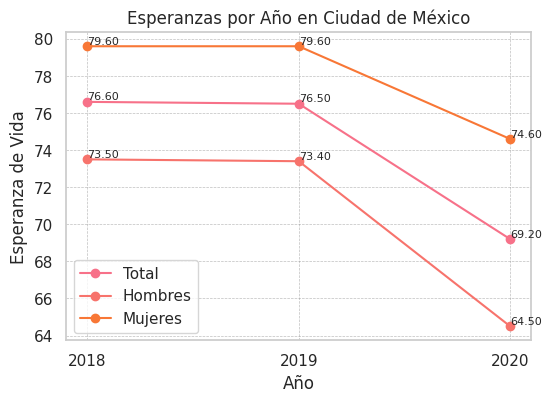

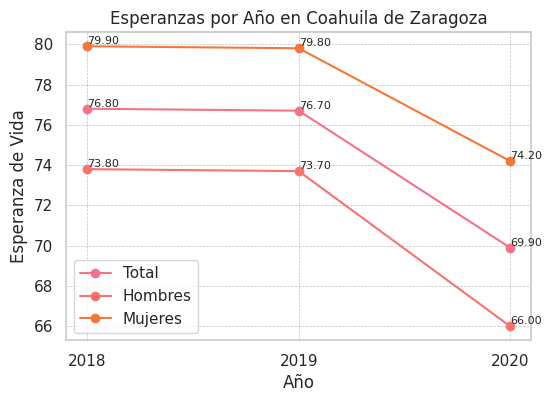

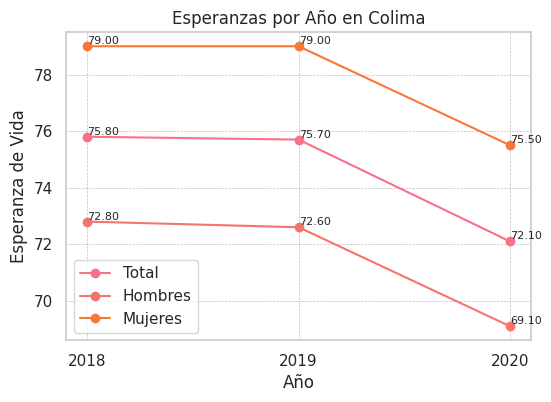

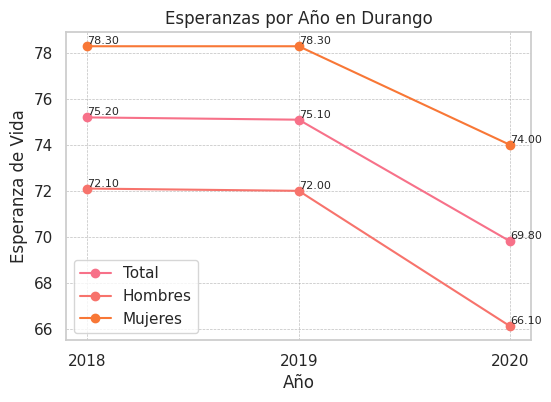

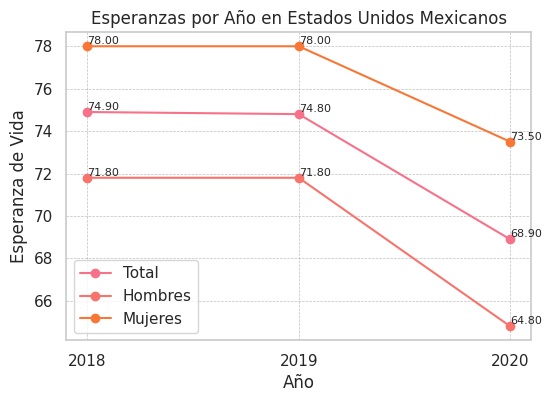

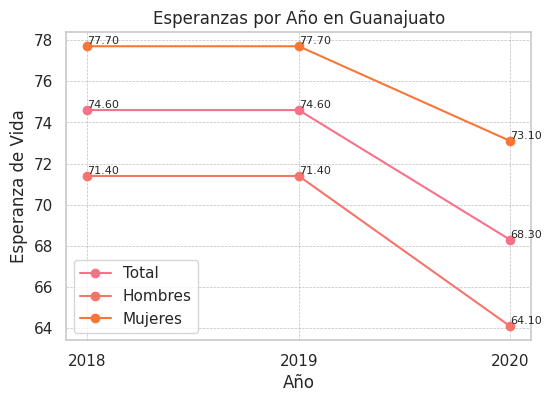

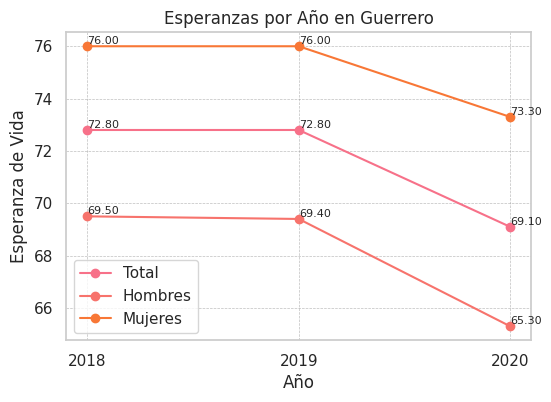

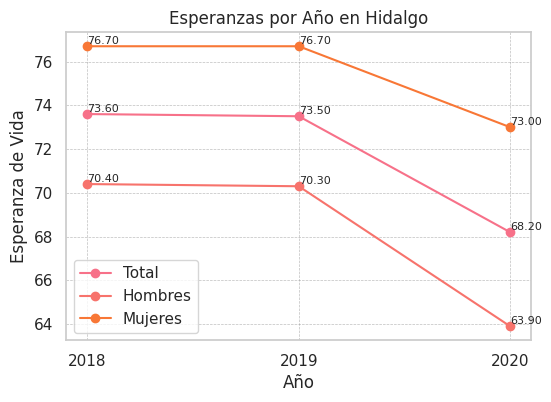

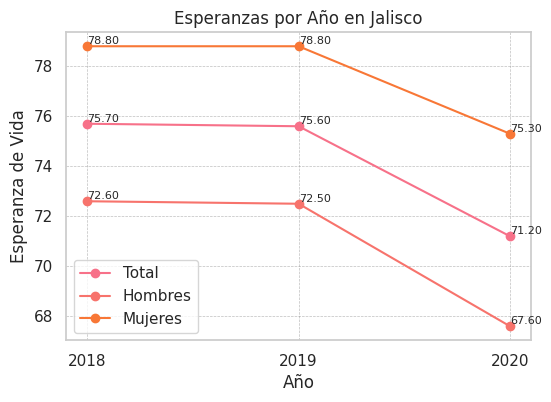

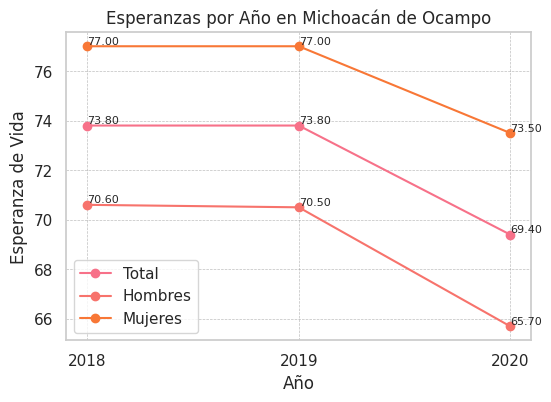

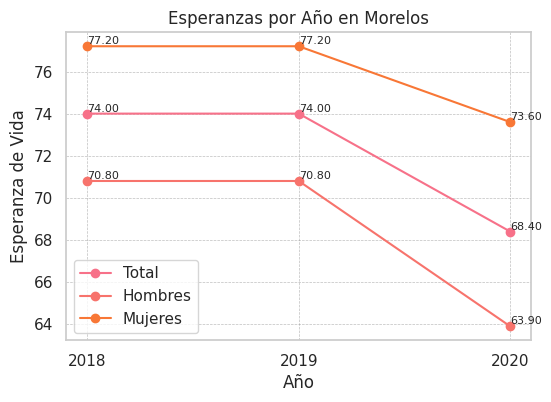

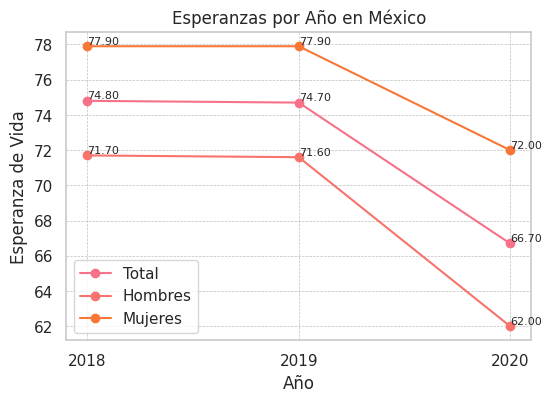

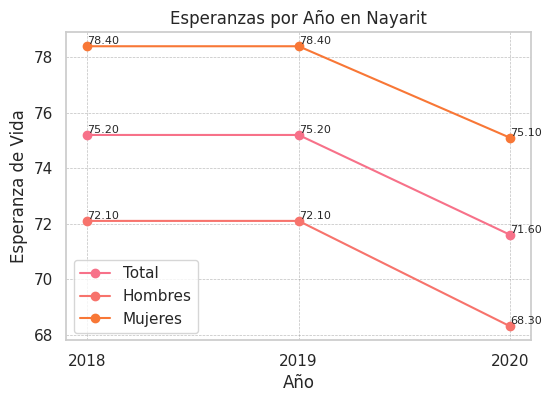

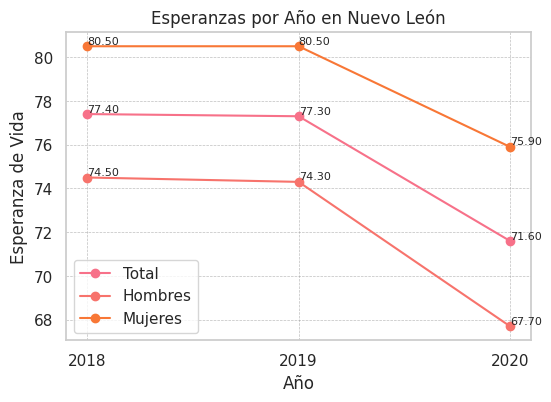

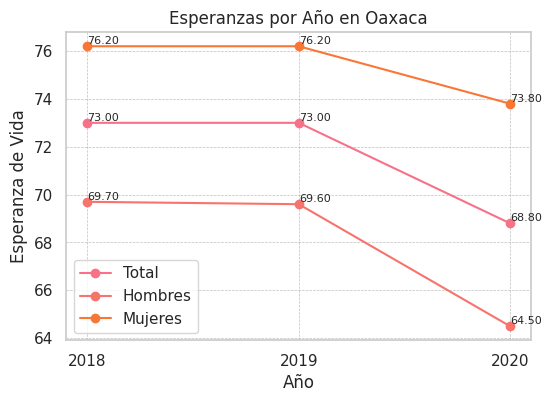

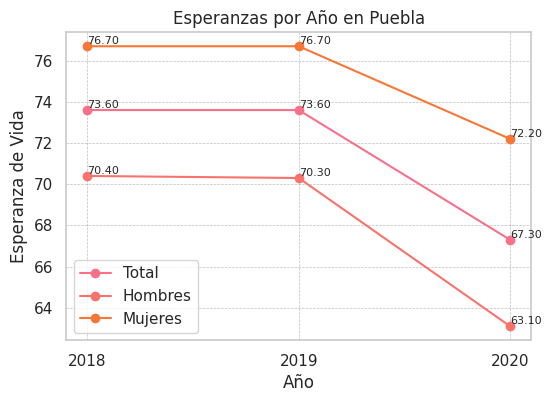

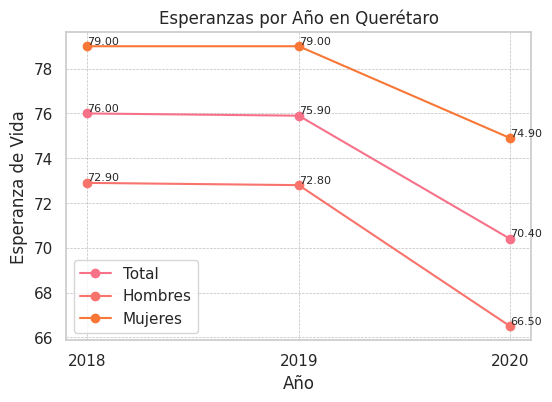

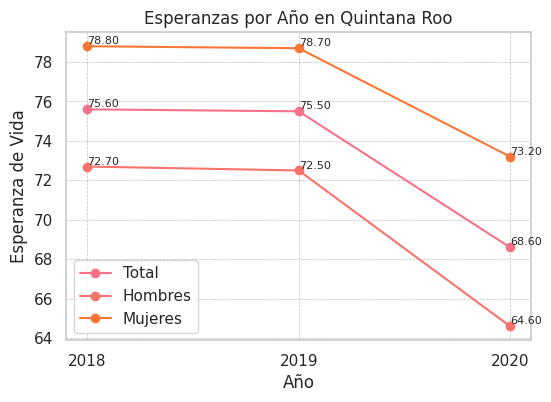

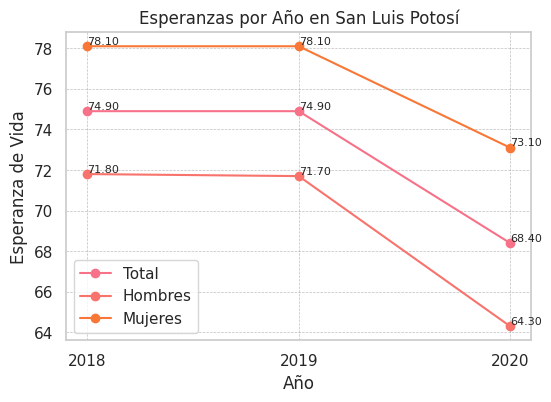

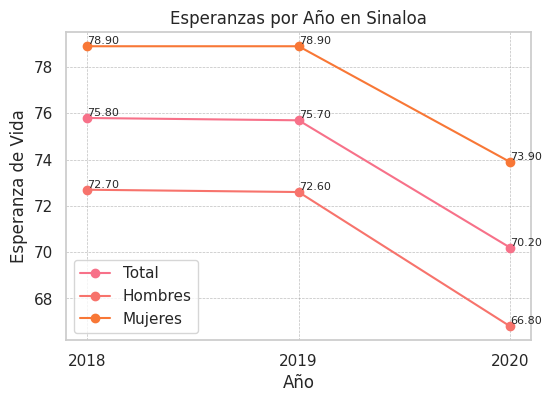

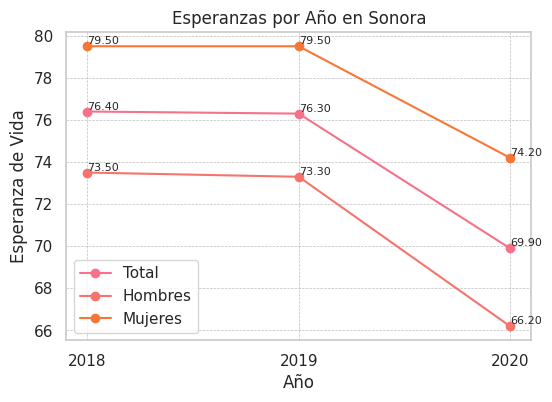

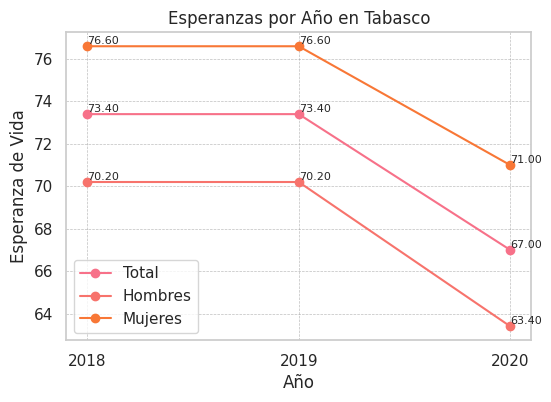

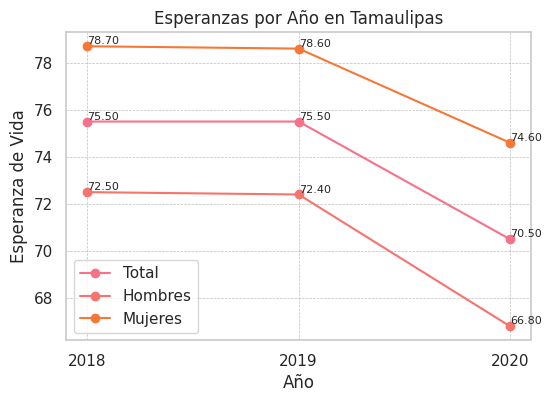

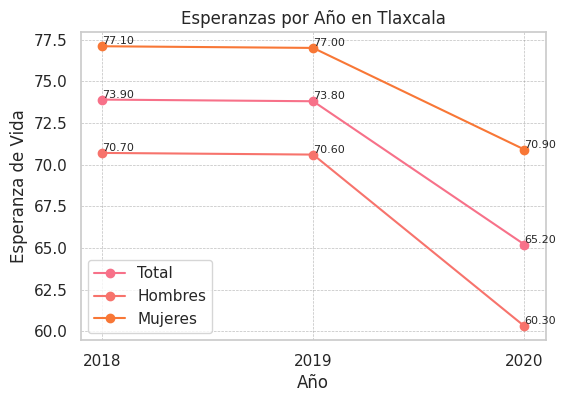

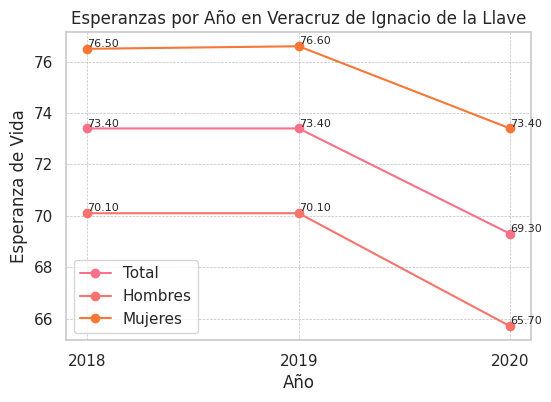

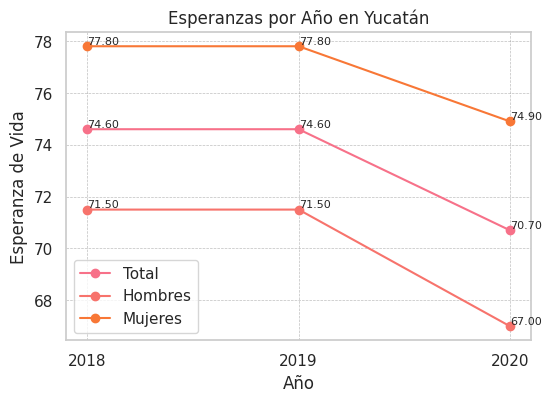

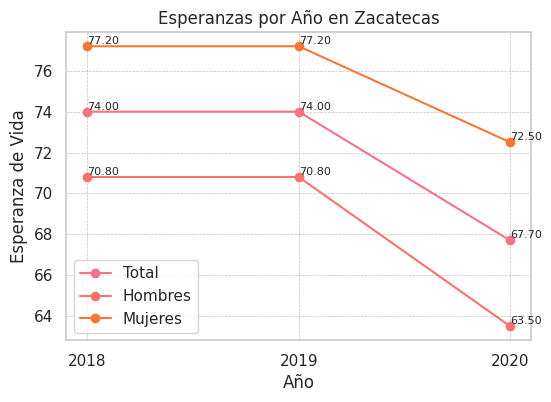

In [ ]:
# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Agrupa los datos por entidad
entidades_grouped = esperanzas.groupby('Entidad')

# Colores para las líneas
colores = sns.color_palette('husl', n_colors=len(entidades_grouped))

# Itera sobre las entidades y crea un gráfico para cada una
for entidad, data_entidad in entidades_grouped:
    plt.figure(figsize=(6, 4))

    # Esperanza de vida total
    total_values = data_entidad[['Total2018', 'Total2019', 'Total2020']].values.flatten()
    plt.plot(['2018', '2019', '2020'], total_values, marker='o', label='Total', color=colores[0])
    for i, value in enumerate(total_values):
        plt.text(i, value, f'{value:.2f}', ha='left', va='bottom',fontsize=10)

    # Esperanza de vida hombres
    hombres_values = data_entidad[['Hombres2018', 'Hombres2019', 'Hombres2020']].values.flatten()
    plt.plot(['2018', '2019', '2020'], hombres_values, marker='o', label='Hombres', color=colores[1])
    for i, value in enumerate(hombres_values):
        plt.text(i, value, f'{value:.2f}', ha='left', va='bottom',fontsize=10)

    # Esperanza de vida mujeres
    mujeres_values = data_entidad[['Mujeres2018', 'Mujeres2019', 'Mujeres2020']].values.flatten()
    plt.plot(['2018', '2019', '2020'], mujeres_values, marker='o', label='Mujeres', color=colores[2])
    for i, value in enumerate(mujeres_values):
        plt.text(i, value, f'{value:.2f}', ha='left', va='bottom',fontsize=10)

    plt.title(f'Esperanzas por Año en {entidad}')
    plt.xlabel('Año')
    plt.ylabel('Edad')
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    plt.show()


In [ ]:
mort_IMSS =mort_IMSS.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_IMSS',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_IMSS',
})
mort_IMSS.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes    2932   2105   
1          2       Baja California    8080   6056   
2          3   Baja California Sur    1221    930   
3          4              Campeche    1400   1014   
4          5  Coahuila de Zaragoza   10235   7883   

   tasa_mortalidad_hombre_IMSS  tasa_mortalidad_mujer_IMSS  
0                     0.004770                    0.003262  
1                     0.013144                    0.009383  
2                     0.001986                    0.001441  
3                     0.002277                    0.001571  
4                     0.016649                    0.012214

In [ ]:
mort_ISSTE =mort_ISSTE.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_ISSTE',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_ISSTE',
})
mort_ISSTE.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes     543    461   
1          2       Baja California     741    672   
2          3   Baja California Sur     557    450   
3          4              Campeche     405    363   
4          5  Coahuila de Zaragoza    1214   1116   

   tasa_mortalidad_hombre_ISSTE  tasa_mortalidad_mujer_ISSTE  
0                      0.000883                     0.000714  
1                      0.001205                     0.001041  
2                      0.000906                     0.000697  
3                      0.000659                     0.000562  
4                      0.001975                     0.001729

In [ ]:
mort_PEMEX =mort_PEMEX.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_PEMEX',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_PEMEX',
})
mort_PEMEX.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes      11      7   
1          2       Baja California      19     12   
2          3   Baja California Sur       2      0   
3          4              Campeche     149     96   
4          5  Coahuila de Zaragoza      18     13   

   tasa_mortalidad_hombre_PEMEX  tasa_mortalidad_mujer_PEMEX  
0                      0.000018                     0.000011  
1                      0.000031                     0.000019  
2                      0.000003                     0.000000  
3                      0.000242                     0.000149  
4                      0.000029                     0.000020

In [ ]:
mort_SEDENA =mort_SEDENA.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_SEDENA',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_SEDENA',
})
mort_SEDENA.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes       8      8   
1          2       Baja California      50     35   
2          3   Baja California Sur      26     16   
3          4              Campeche      24     12   
4          5  Coahuila de Zaragoza      35     30   

   tasa_mortalidad_hombre_SEDENA  tasa_mortalidad_mujer_SEDENA  
0                       0.000013                      0.000012  
1                       0.000081                      0.000054  
2                       0.000042                      0.000025  
3                       0.000039                      0.000019  
4                       0.000057                      0.000046

In [ ]:
mort_SEMAR =mort_SEMAR.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_SEMAR',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_SEMAR',
})
mort_SEMAR.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes       0      4   
1          2       Baja California      24     13   
2          3   Baja California Sur       9      8   
3          4              Campeche      46     33   
4          5  Coahuila de Zaragoza       0      1   

   tasa_mortalidad_hombre_SEMAR  tasa_mortalidad_mujer_SEMAR  
0                      0.000000                     0.000006  
1                      0.000039                     0.000020  
2                      0.000015                     0.000012  
3                      0.000075                     0.000051  
4                      0.000000                     0.000002

In [ ]:
mort_SP_INSABI =mort_SP_INSABI.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_SP_INSABI',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_SP_INSABI',
})
mort_SP_INSABI.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes     575    476   
1          2       Baja California    1802   1051   
2          3   Baja California Sur     309    196   
3          4              Campeche     573    445   
4          5  Coahuila de Zaragoza     481    426   

   tasa_mortalidad_hombre_SP_INSABI  tasa_mortalidad_mujer_SP_INSABI  
0                          0.000935                         0.000738  
1                          0.002931                         0.001628  
2                          0.000503                         0.000304  
3                          0.000932                         0.000689  
4                          0.000782                         0.000660

In [ ]:
mort_ninguna =mort_ninguna.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_ninguna',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_ninguna',
})
mort_ninguna.head()

clave_ent               entidad  hombre  mujer  \
0          1        Aguascalientes     889    495   
1          2       Baja California    5079   2062   
2          3   Baja California Sur     515    227   
3          4              Campeche     844    526   
4          5  Coahuila de Zaragoza    2026   1152   

   tasa_mortalidad_hombre_ninguna  tasa_mortalidad_mujer_ninguna  
0                        0.001446                       0.000767  
1                        0.008262                       0.003195  
2                        0.000838                       0.000352  
3                        0.001373                       0.000815  
4                        0.003296                       0.001785

In [ ]:
mort_otra =mort_otra.rename(columns={
    'tasa_mortalidad_hombre': 'tasa_mortalidad_hombre_otra',
    'tasa_mortalidad_mujer': 'tasa_mortalidad_mujer_otra',
    'entidad':'Entidad'
})
mort_otra.head()

clave_ent               Entidad  hombre  mujer  \
0          1        Aguascalientes      60     34   
1          2       Baja California    1123    896   
2          3   Baja California Sur      17     14   
3          4              Campeche     119     59   
4          5  Coahuila de Zaragoza     191    174   

   tasa_mortalidad_hombre_otra  tasa_mortalidad_mujer_otra  
0                     0.000098                    0.000053  
1                     0.001827                    0.001388  
2                     0.000028                    0.000022  
3                     0.000194                    0.000091  
4                     0.000311                    0.000270

In [ ]:
esperanzas = esperanzas[esperanzas['Entidad'] != 'Estados Unidos Mexicanos']
esperanzas = esperanzas.reset_index(drop=True)


In [ ]:
todo=pd.concat([mort_ninguna,mort_IMSS,mort_ISSTE,mort_PEMEX,mort_SEDENA,mort_SEMAR,mort_SP_INSABI, mort_general, esperanzas,pib], axis=1)
todo

clave_ent                          entidad  hombre  mujer  \
0           1                   Aguascalientes     889    495   
1           2                  Baja California    5079   2062   
2           3              Baja California Sur     515    227   
3           4                         Campeche     844    526   
4           5             Coahuila de Zaragoza    2026   1152   
5           6                           Colima     765    307   
6           7                          Chiapas   10019   7591   
7           8                        Chihuahua    4526   1751   
8           9                 Ciudad de México   19486  11647   
9          10                          Durango    1415    861   
10         11                       Guanajuato    6917   4728   
11         12                         Guerrero    4340   2935   
12         13                          Hidalgo    4634   3405   
13         14                          Jalisco    9324   5918   
14         15                           México   28635  18123   
15         16              Michoacán de Ocampo    8722   5915   
16         17                          Morelos    3486   1928   
17         18                          Nayarit     959    530   
18         19                       Nuevo León    3401   1773   
19         20                           Oaxaca    7276   5334   
20         21                           Puebla   13097   9687   
21         22                        Querétaro    3115   2147   
22         23                     Quintana Roo    1252    597   
23         24                  San Luis Potosí    3149   1841   
24         25                          Sinaloa    1510    679   
25         26                           Sonora    3250   1271   
26         27                          Tabasco    4067   2839   
27         28                       Tamaulipas    2648   1367   
28         29                         Tlaxcala    2427   1693   
29         30  Veracruz de Ignacio de la Llave   13590   9439   
30         31                          Yucatán    1896   1245   
31         32                        Zacatecas    2556   1516   

    tasa_mortalidad_hombre_ninguna  tasa_mortalidad_mujer_ninguna  clave_ent  \
0                         0.001446                       0.000767          1   
1                         0.008262                       0.003195          2   
2                         0.000838                       0.000352          3   
3                         0.001373                       0.000815          4   
4                         0.003296                       0.001785          5   
5                         0.001244                       0.000476          6   
6                         0.016298                       0.011762          7   
7                         0.007363                       0.002713          8   
8                         0.031698                       0.018046          9   
9                         0.002302                       0.001334         10   
10                        0.011252                       0.007326         11   
11                        0.007060                       0.004548         12   
12                        0.007538                       0.005276         13   
13                        0.015168                       0.009169         14   
14                        0.046581                       0.028080         15   
15                        0.014188                       0.009165         16   
16                        0.005671                       0.002987         17   
17                        0.001560                       0.000821         18   
18                        0.005532                       0.002747         19   
19                        0.011836                       0.008265         20   
20                        0.021305                       0.015009         21   
21                        0.005067                       0.003327         22   
22                

In [ ]:
columnas_a_eliminar = ['entidad','Entidad', 'hombre', 'mujer']
todo = todo.drop(columnas_a_eliminar, axis=1)

In [ ]:
todo = todo.loc[:, ~todo.columns.duplicated(keep='first')]

In [ ]:
nombres_columnas = todo.columns
columnas_ordenadas = ['clave_ent'] + [col for col in nombres_columnas if col != 'Entidad']
todo = todo[columnas_ordenadas]


In [ ]:
todo.columns

Index(['clave_ent', 'clave_ent', 'tasa_mortalidad_hombre_ninguna',
       'tasa_mortalidad_mujer_ninguna', 'tasa_mortalidad_hombre_IMSS',
       'tasa_mortalidad_mujer_IMSS', 'tasa_mortalidad_hombre_ISSTE',
       'tasa_mortalidad_mujer_ISSTE', 'tasa_mortalidad_hombre_PEMEX',
       'tasa_mortalidad_mujer_PEMEX', 'tasa_mortalidad_hombre_SEDENA',
       'tasa_mortalidad_mujer_SEDENA', 'tasa_mortalidad_hombre_SEMAR',
       'tasa_mortalidad_mujer_SEMAR', 'tasa_mortalidad_hombre_SP_INSABI',
       'tasa_mortalidad_mujer_SP_INSABI', 'tasa_mortalidad_hombre',
       'tasa_mortalidad_mujer', 'tasa_mortalidad_general', 'Total2018',
       'Hombres2018', 'Mujeres2018', 'Total2019', 'Hombres2019', 'Mujeres2019',
       'Total2020', 'Hombres2020', 'Mujeres2020', 'pib2018', 'pib2019',
       'pib2020'],
      dtype='object')

In [ ]:
todo=todo.drop('clave_ent',axis=1)

In [ ]:

todo['clave_ent'] = range(1, 33)
columnas_a_eliminar = ['Total2019','Total2018', 'Hombres2019', 'Mujeres2019','Hombres2018', 'Mujeres2018','pib2018','pib2019']
todo = todo.drop(columnas_a_eliminar, axis=1)
todo

<ipython-input-198-f3553ddb4758>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  todo['clave_ent'] = range(1, 33)


clave_ent  tasa_mortalidad_hombre_ninguna  tasa_mortalidad_mujer_ninguna  \
0           1                        0.001446                       0.000767   
1           2                        0.008262                       0.003195   
2           3                        0.000838                       0.000352   
3           4                        0.001373                       0.000815   
4           5                        0.003296                       0.001785   
5           6                        0.001244                       0.000476   
6           7                        0.016298                       0.011762   
7           8                        0.007363                       0.002713   
8           9                        0.031698                       0.018046   
9          10                        0.002302                       0.001334   
10         11                        0.011252                       0.007326   
11         12                        0.007060                       0.004548   
12         13                        0.007538                       0.005276   
13         14                        0.015168                       0.009169   
14         15                        0.046581                       0.028080   
15         16                        0.014188                       0.009165   
16         17                        0.005671                       0.002987   
17         18                        0.001560                       0.000821   
18         19                        0.005532                       0.002747   
19         20                        0.011836                       0.008265   
20         21                        0.021305                       0.015009   
21         22                        0.005067                       0.003327   
22         23                        0.002037                       0.000925   
23         24                        0.005123                       0.002852   
24         25                        0.002456                       0.001052   
25         26                        0.005287                       0.001969   
26         27                        0.006616                       0.004399   
27         28                        0.004308                       0.002118   
28         29                        0.003948                       0.002623   
29         30                        0.022107                       0.014625   
30         31                        0.003084                       0.001929   
31         32                        0.004158                       0.002349   

    tasa_mortalidad_hombre_IMSS  tasa_mortalidad_mujer_IMSS  \
0                      0.004770                    0.003262   
1                      0.013144                    0.009383   
2                      0.001986                    0.001441   
3                      0.002277                    0.001571   
4                      0.016649                    0.012214   
5                      0.002748                    0.001757   
6                      0.004630                    0.003074   
7                      0.016601                    0.012040   
8                      0.051295                    0.037149   
9                      0.005611                    0.004125   
10                     0.012952                    0.009135   
11                     0.004691                    0.003147   
12                     0.005695                    0.003832   
13                     0.026433                    0.019143   
14                     0.047733                    0.031049   
15                     0.008173                    0.005682   
16                     0.005780                    0.004083   
17                     0.003198                    0.002213   
18                     0.025003                    0.017707   
19                     0.004498                    0.003232   
20                     0.012078         

In [ ]:
todo.columns

Index(['clave_ent', 'tasa_mortalidad_hombre_ninguna',
       'tasa_mortalidad_mujer_ninguna', 'tasa_mortalidad_hombre_IMSS',
       'tasa_mortalidad_mujer_IMSS', 'tasa_mortalidad_hombre_ISSTE',
       'tasa_mortalidad_mujer_ISSTE', 'tasa_mortalidad_hombre_PEMEX',
       'tasa_mortalidad_mujer_PEMEX', 'tasa_mortalidad_hombre_SEDENA',
       'tasa_mortalidad_mujer_SEDENA', 'tasa_mortalidad_hombre_SEMAR',
       'tasa_mortalidad_mujer_SEMAR', 'tasa_mortalidad_hombre_SP_INSABI',
       'tasa_mortalidad_mujer_SP_INSABI', 'tasa_mortalidad_hombre',
       'tasa_mortalidad_mujer', 'tasa_mortalidad_general', 'Total2020',
       'Hombres2020', 'Mujeres2020', 'pib2020', 'clave_ent'],
      dtype='object')

In [ ]:
pob_general


clave_ent                          entidad   hombre    mujer
0           1                   Aguascalientes   696683   728924
1           2                  Baja California  1900589  1868431
2           3              Baja California Sur   405879   392568
3           4                         Campeche   456939   471424
4           5             Coahuila de Zaragoza  1563669  1583102
5           6                           Colima   360622   370769
6           7                          Chiapas  2705947  2837881
7           8                        Chihuahua  1853822  1888047
8           9                 Ciudad de México  4404927  4805017
9          10                          Durango   904866   927784
10         11                       Guanajuato  2996454  3170480
11         12                         Guerrero  1700612  1840073
12         13                          Hidalgo  1481379  1601462
13         14                          Jalisco  4098455  4249696
14         15                           México  8251295  8741123
15         16              Michoacán de Ocampo  2306341  2442505
16         17                          Morelos   950847  1020673
17         18                          Nayarit   612278   623178
18         19                       Nuevo León  2890950  2893492
19         20                           Oaxaca  1974843  2157305
20         21                           Puebla  3160115  3423163
21         22                        Querétaro  1156820  1211647
22         23                     Quintana Roo   936779   921206
23         24                  San Luis Potosí  1372451  1449804
24         25                          Sinaloa  1494815  1532128
25         26                           Sonora  1472197  1472643
26         27                          Tabasco  1173671  1228927
27         28                       Tamaulipas  1736140  1791595
28         29                         Tlaxcala   649894   693083
29         30  Veracruz de Ignacio de la Llave  3871774  4190805
30         31                          Yucatán  1140279  1180619
31         32                        Zacatecas   791058   831080

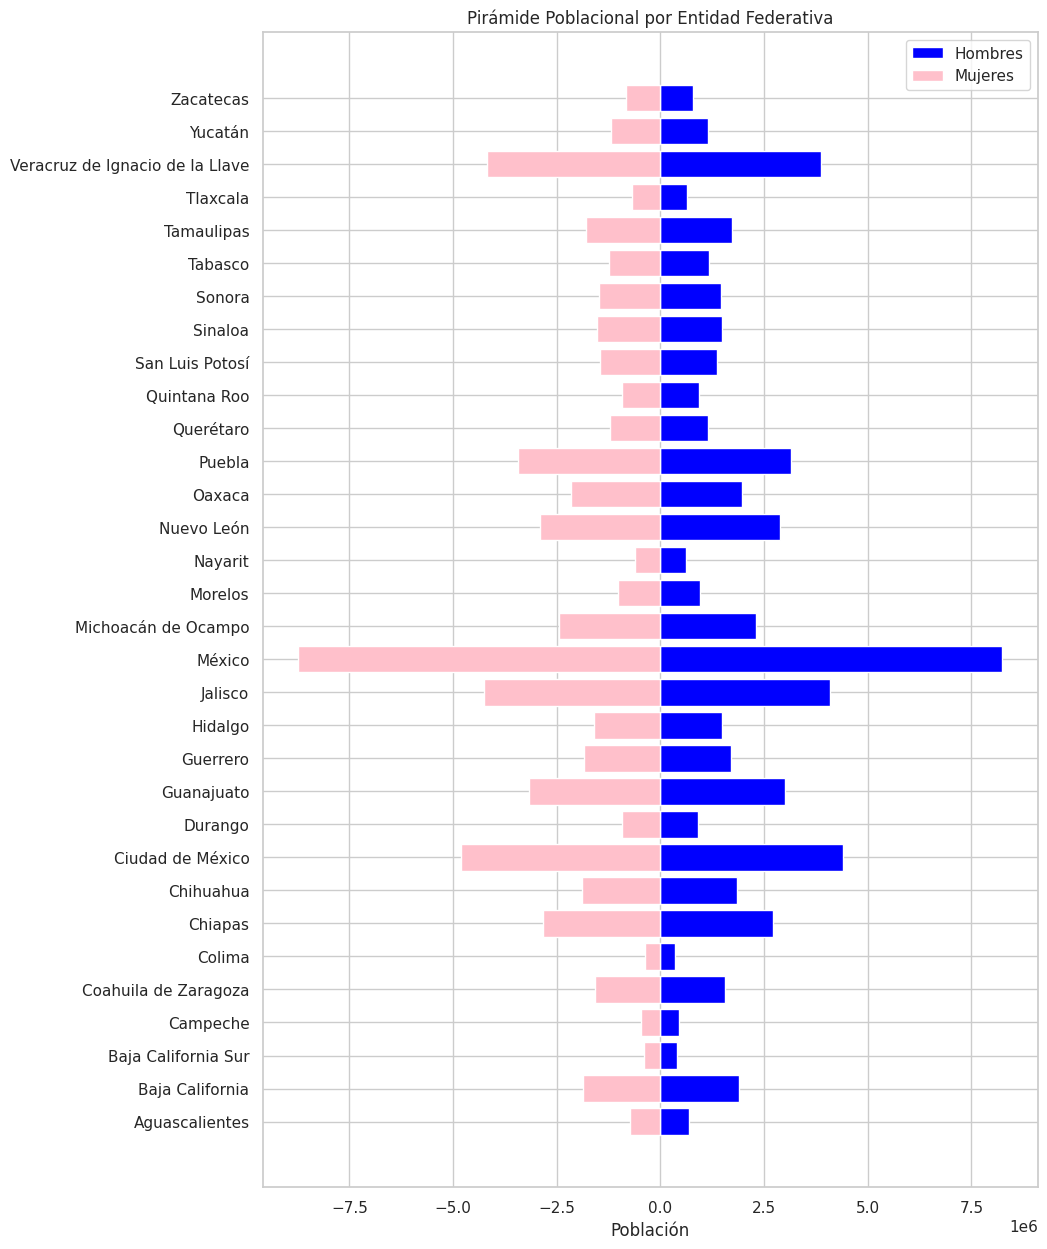

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))

# Crear barras para hombres y mujeres
ax.barh(pob_general['entidad'], pob_general['hombre'], color='blue', label='Hombres')
ax.barh(pob_general['entidad'], -pob_general['mujer'], color='pink', label='Mujeres')

# Configuraciones adicionales
ax.set_xlabel('Población')
ax.set_title('Pirámide Poblacional por Entidad Federativa')
ax.legend()

# Mostrar la pirámide poblacional
plt.show()

In [2]:
uploaded = files.upload()


Saving Distribucion-de-Unidades-economicas-segun-entidades-federativas-2019.csv to Distribucion-de-Unidades-economicas-segun-entidades-federativas-2019.csv


In [ ]:
pob_estado = pd.read_csv(io.BytesIO(uploaded["pob_estado (2).csv"]), sep=',', decimal='.')
pob_estado.shape

(2757, 4)

In [ ]:
pob_estado.isna().sum()

Entidad    5
Edad       5
Hombres    5
Mujeres    5
dtype: int64

In [ ]:
pob_estado.fillna(0, inplace=True)

In [ ]:
pob_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Entidad  2757 non-null   object
 1   hombres  2757 non-null   int64 
 2   mujeres  2757 non-null   int64 
 3   edad     2757 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 86.3+ KB


In [ ]:
pob_estado['hombres'] = pob_estado['Hombres'].astype(int)
pob_estado['mujeres'] = pob_estado['Mujeres'].astype(int)
pob_estado['edad'] = pob_estado['Edad'].astype(int)

In [ ]:
columnas_a_eliminar = ['Edad', 'Hombres', 'Mujeres']
pob_estado = pob_estado.drop(columnas_a_eliminar, axis=1)

In [ ]:
pob_estado = pob_estado.iloc[:-5]
print(pob_estado)

             Entidad  hombres  mujeres  edad
0     Aguascalientes    11412    10893     0
1     Aguascalientes    11878    11882     1
2     Aguascalientes    12970    12829     2
3     Aguascalientes    13406    13011     3
4     Aguascalientes    13312    12837     4
...              ...      ...      ...   ...
2747       Zacatecas     1424     1448    81
2748       Zacatecas     1678     1813    82
2749       Zacatecas     1595     1747    83
2750       Zacatecas     1564     1780    84
2751       Zacatecas     8233     9273    85

[2752 rows x 4 columns]


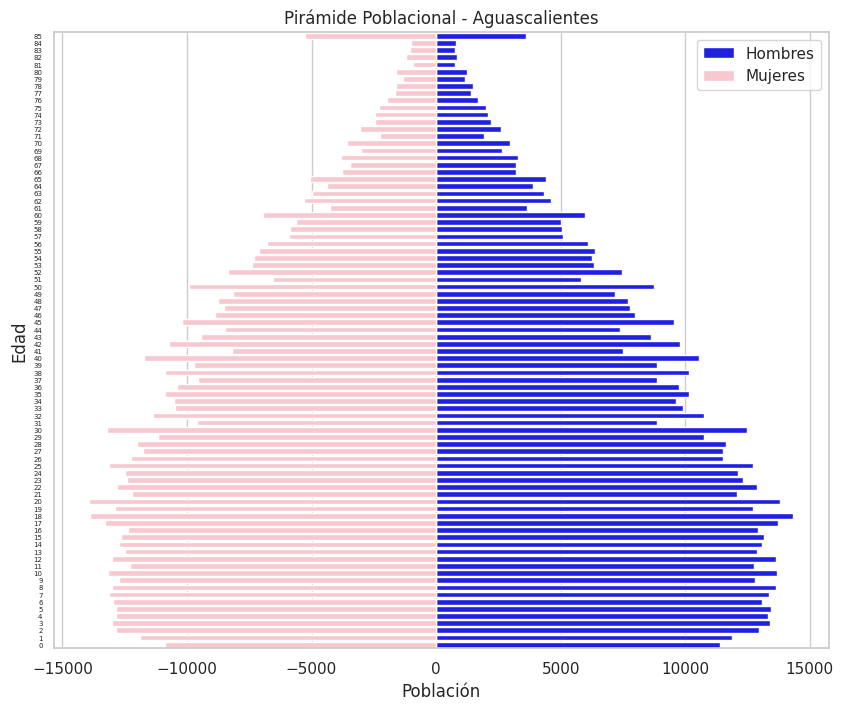

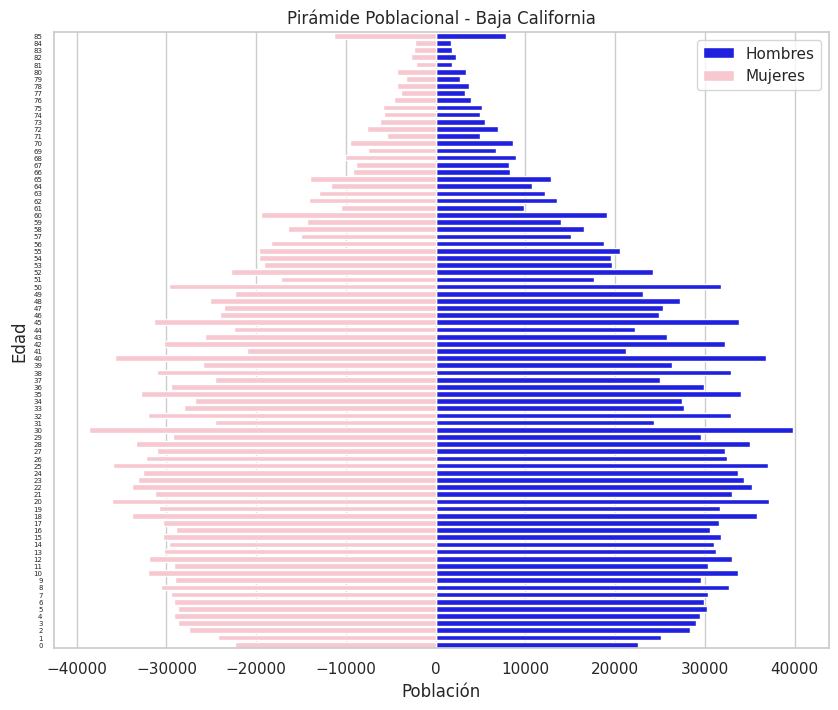

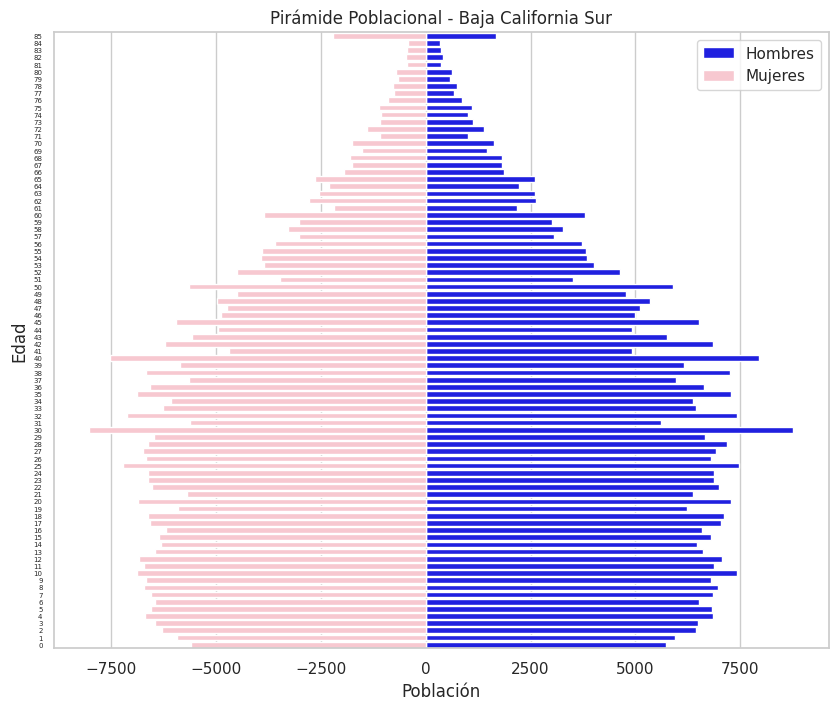

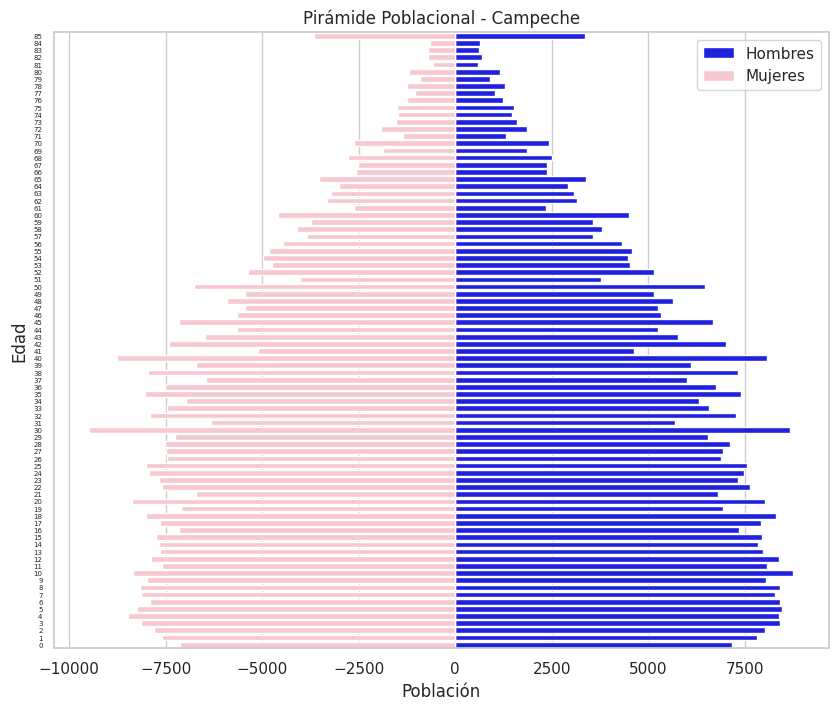

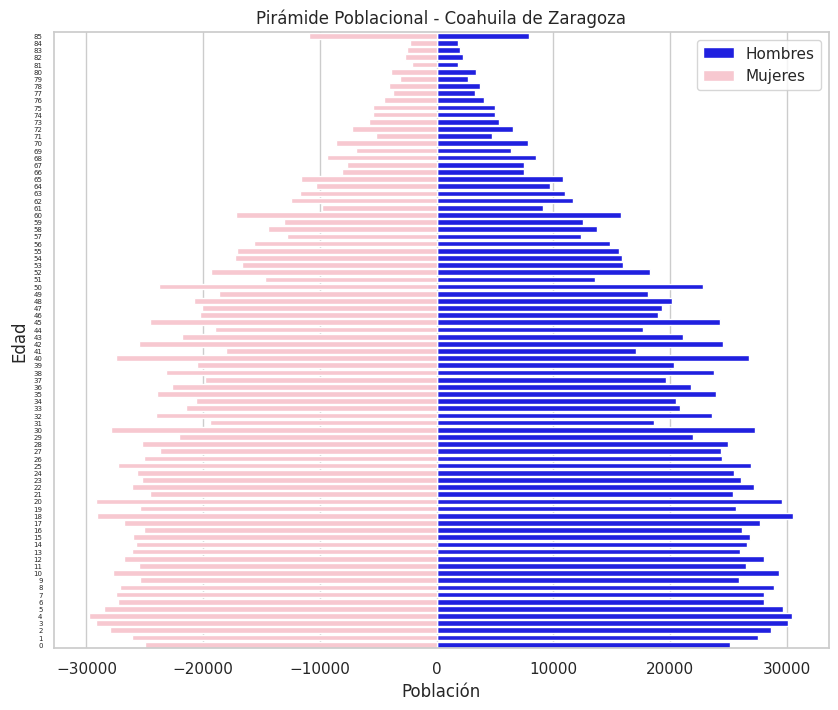

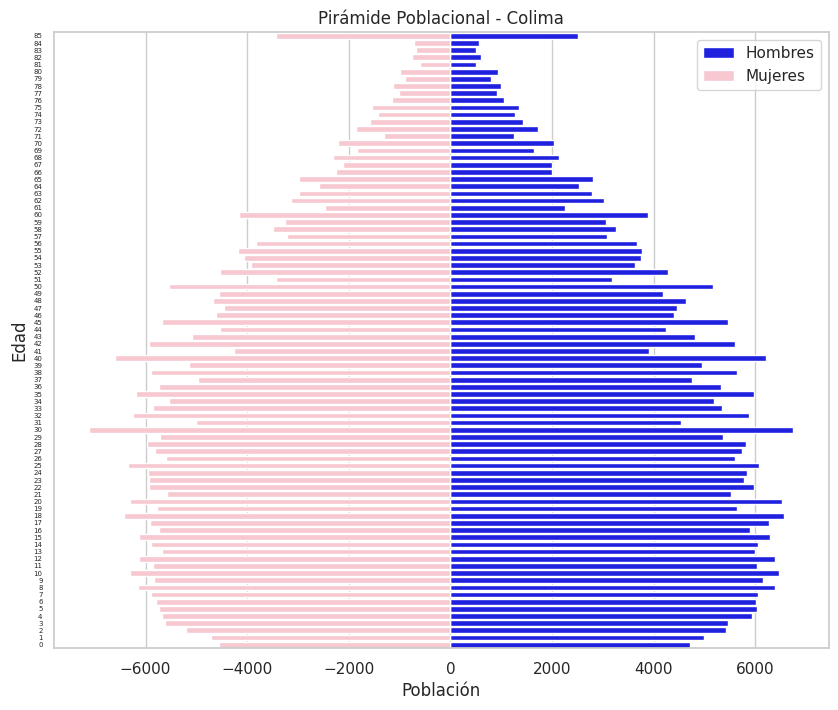

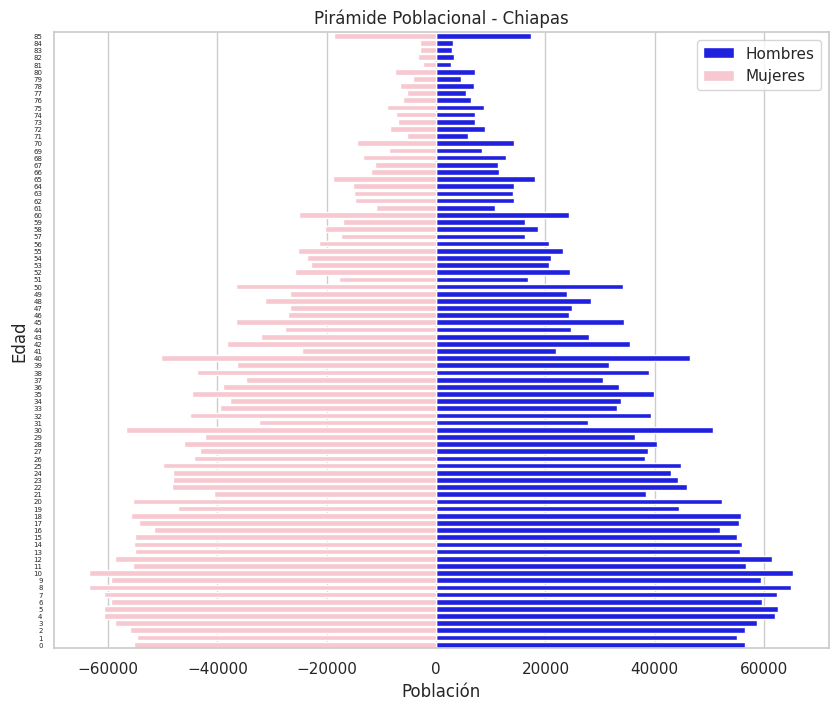

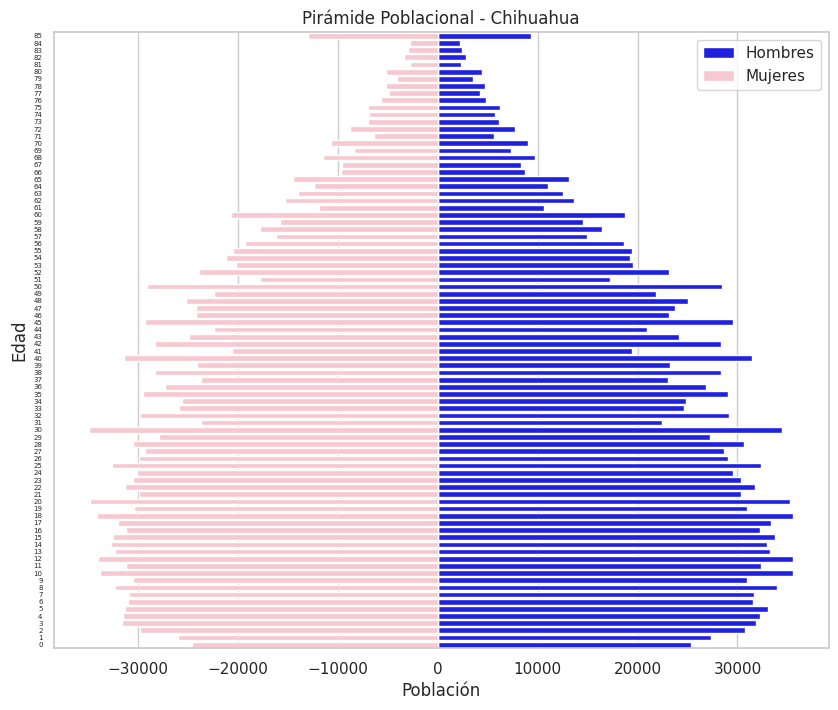

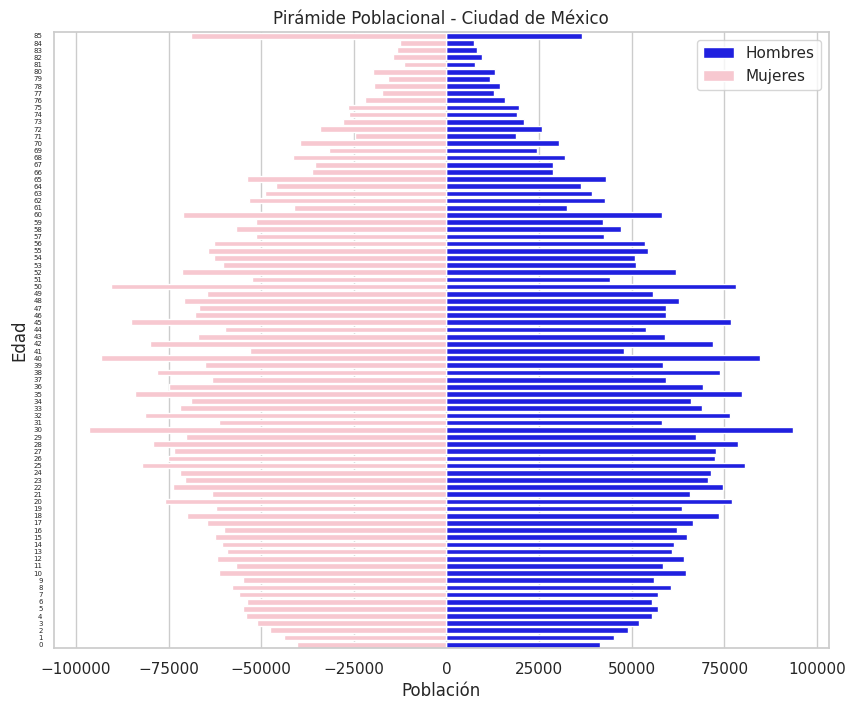

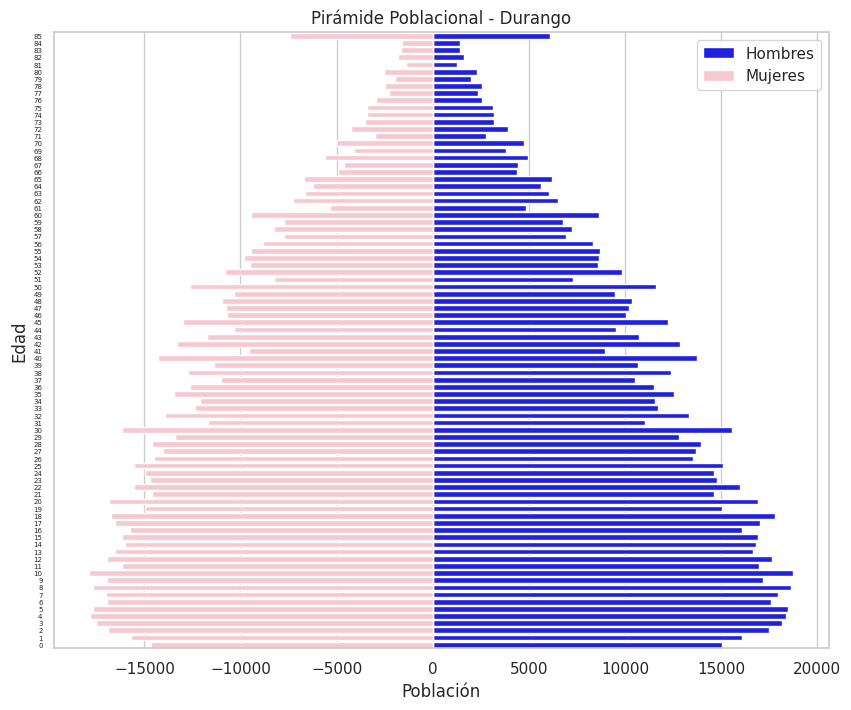

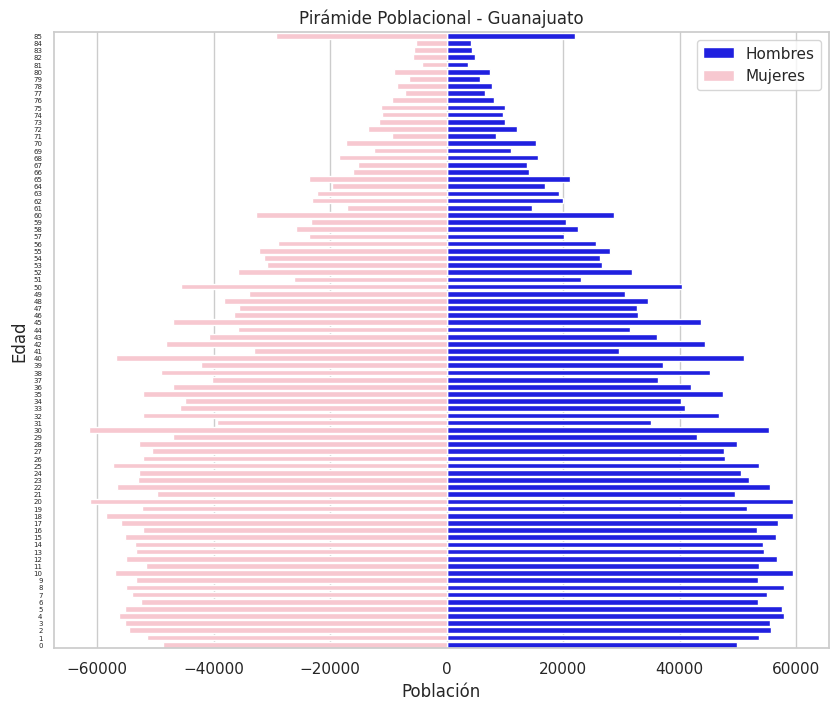

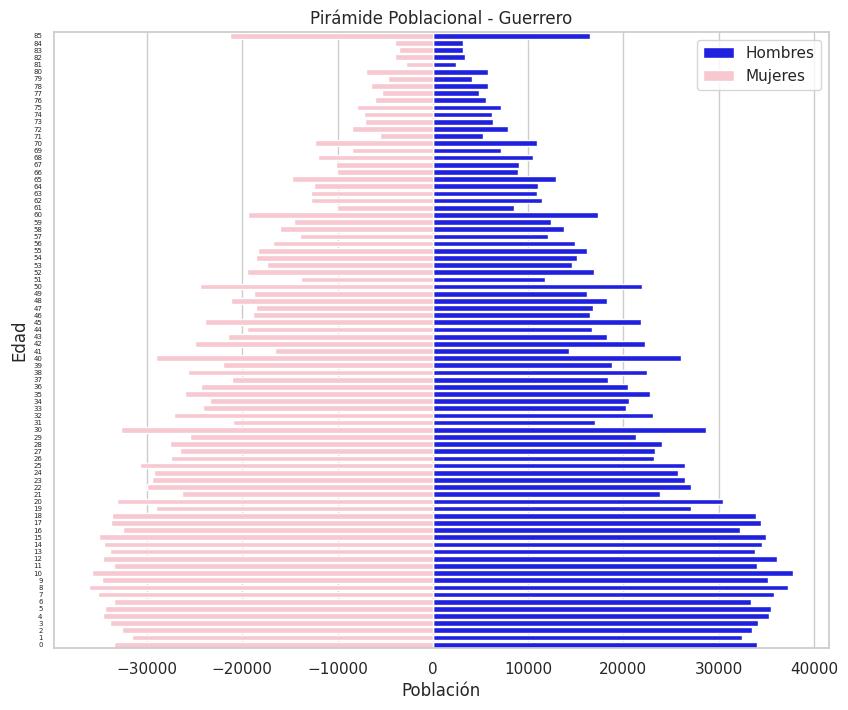

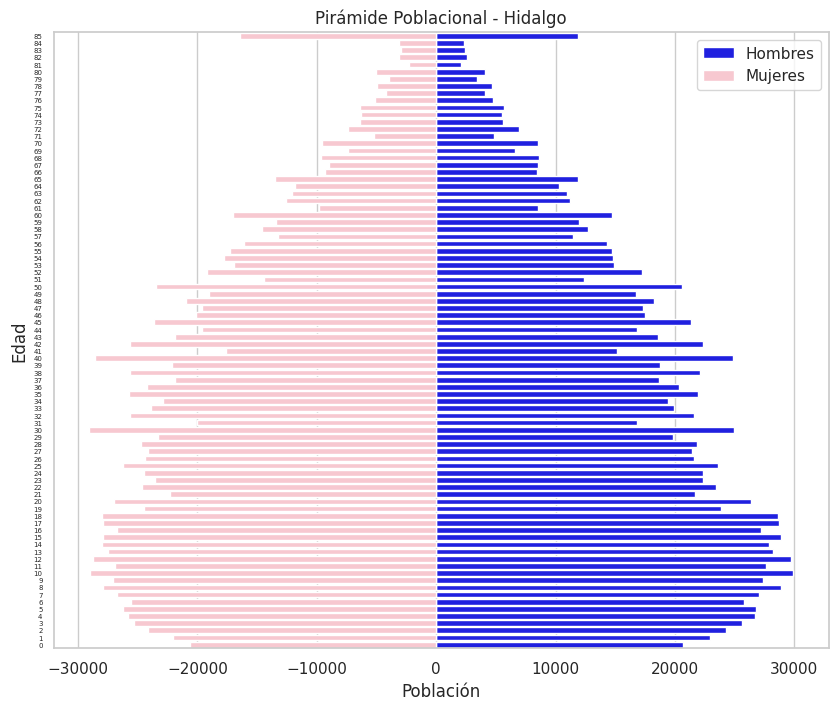

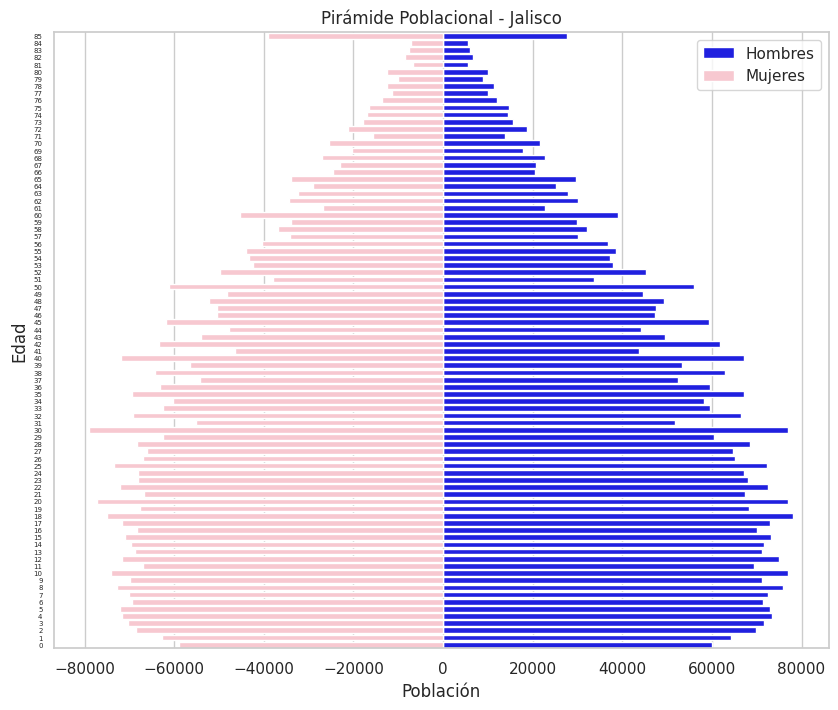

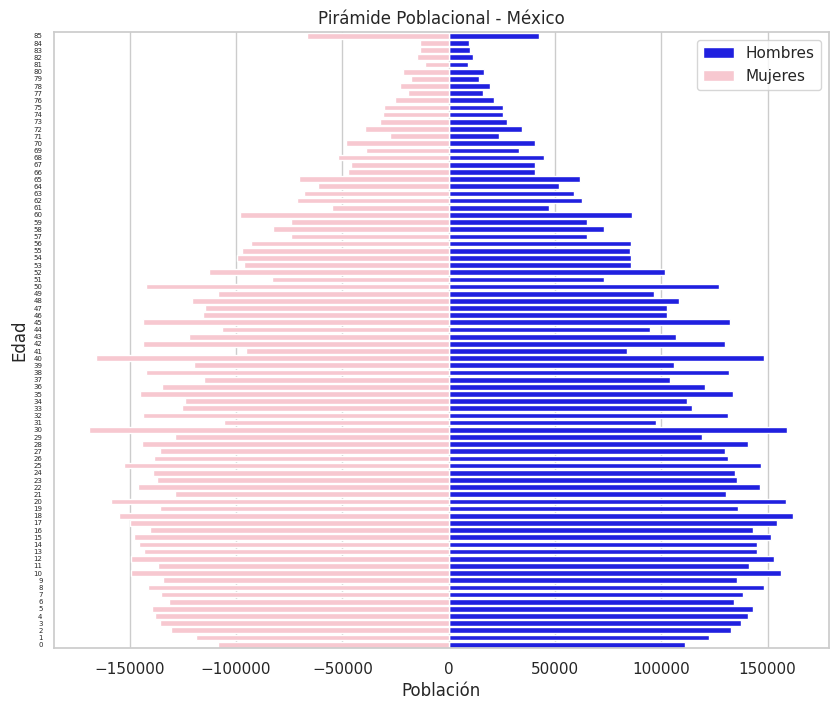

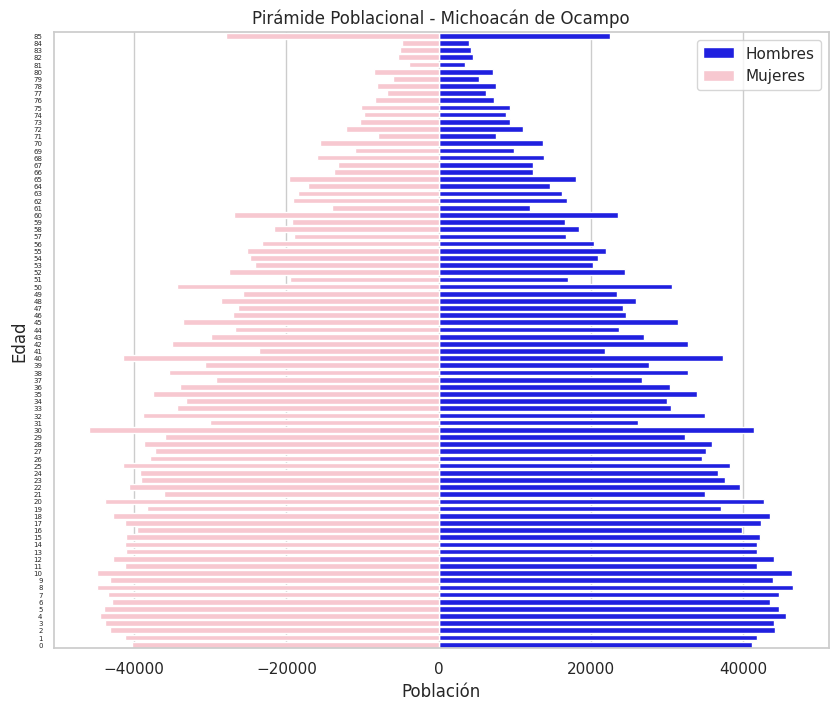

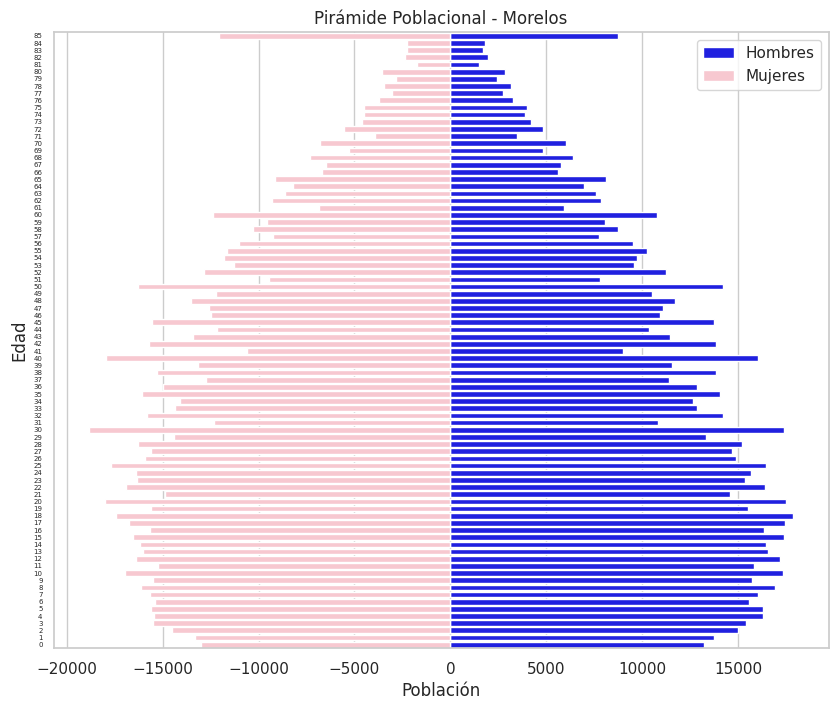

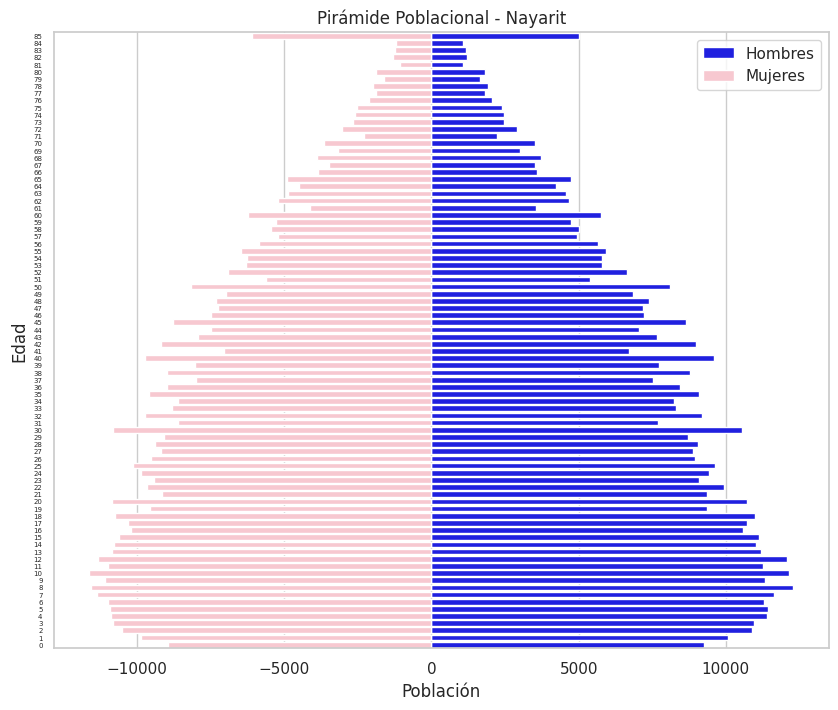

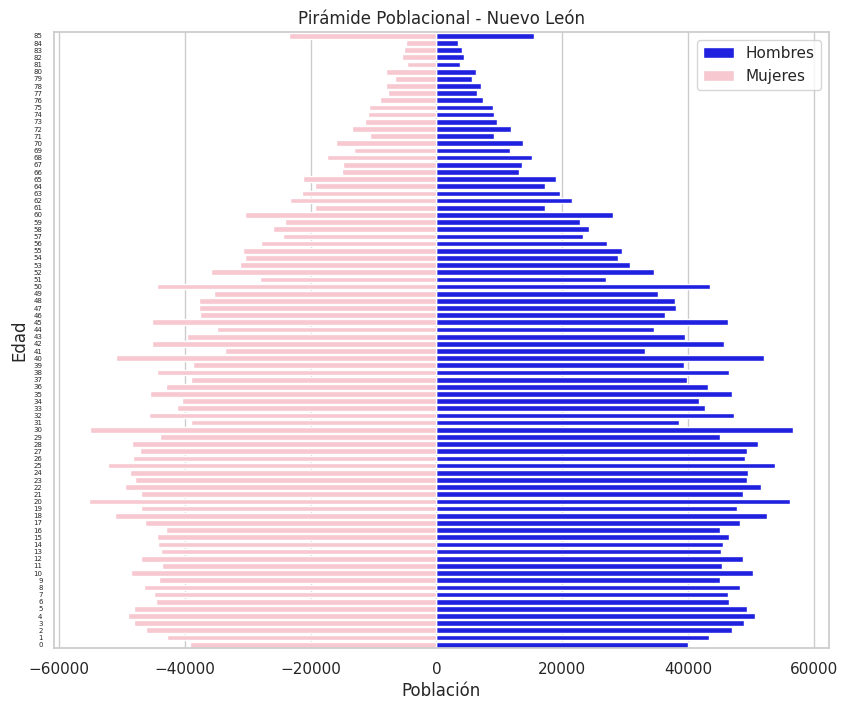

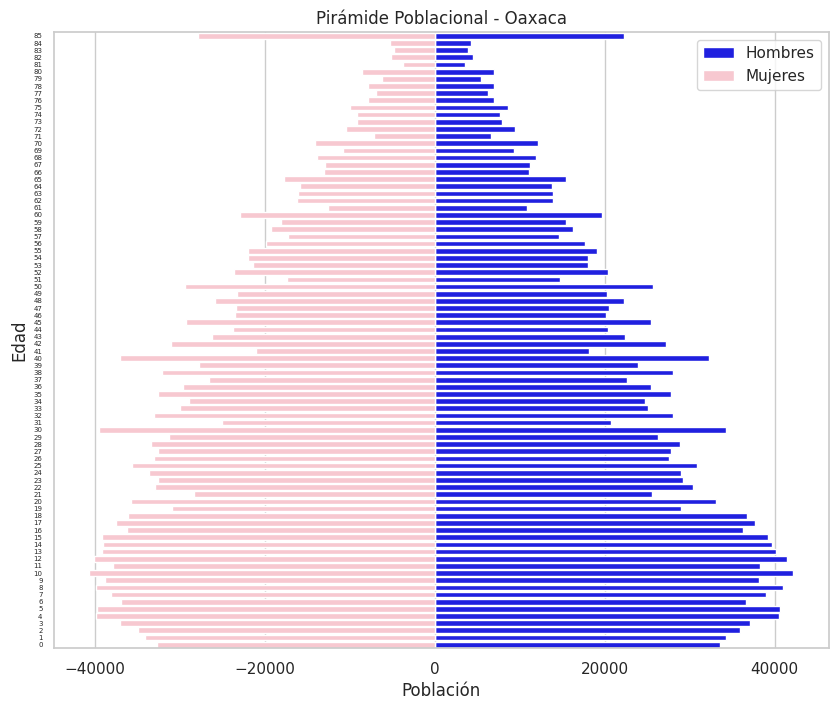

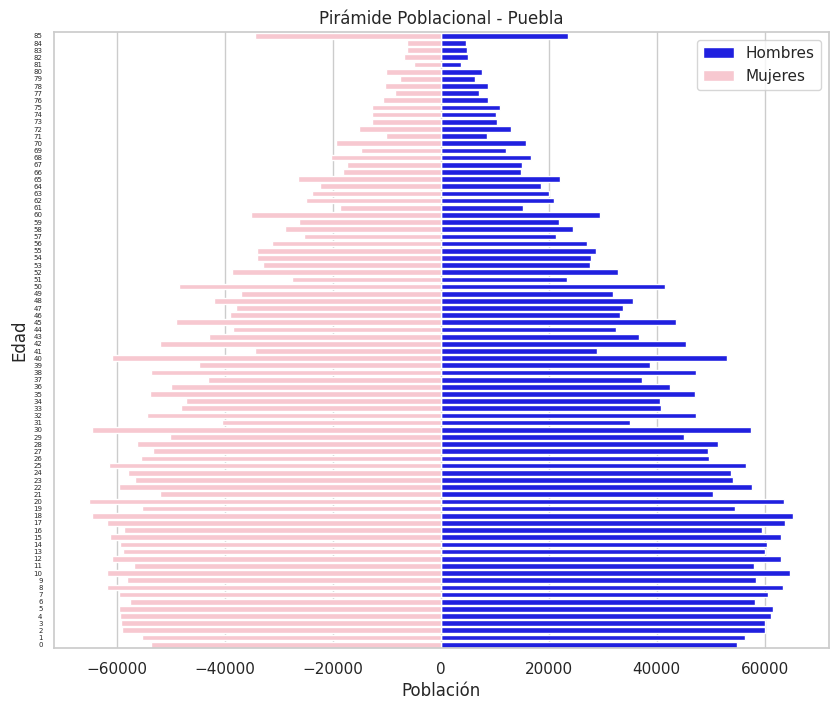

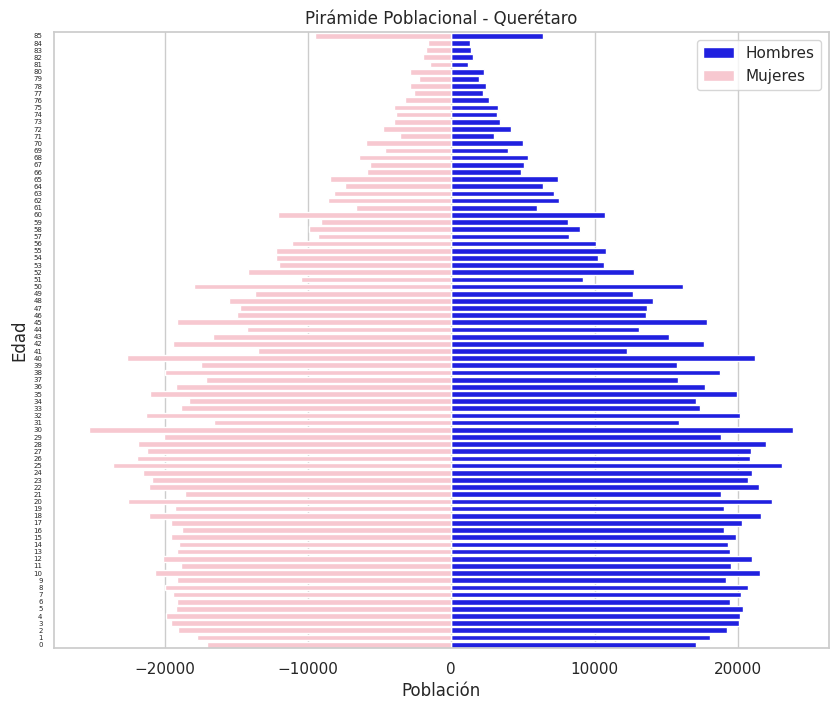

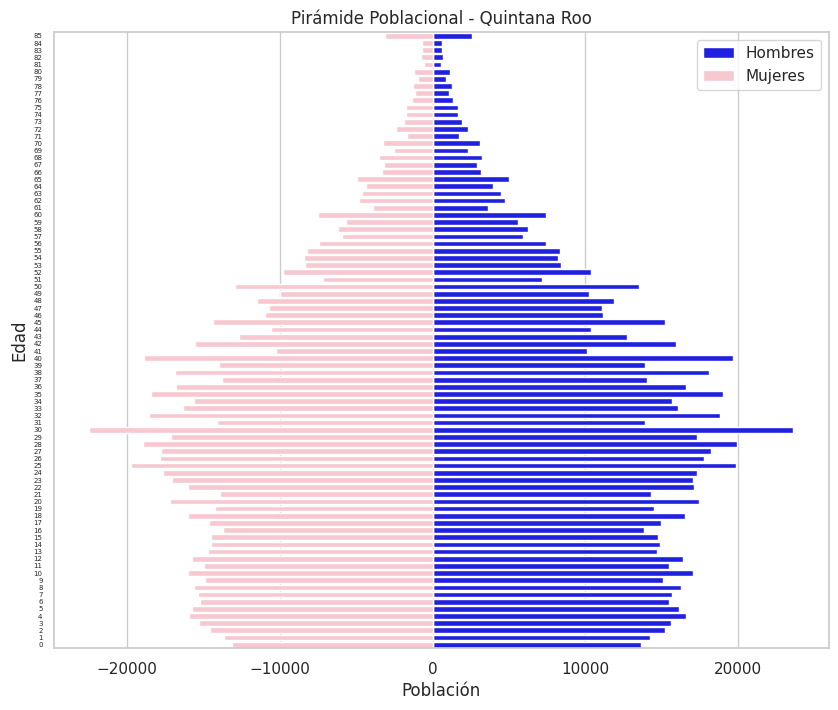

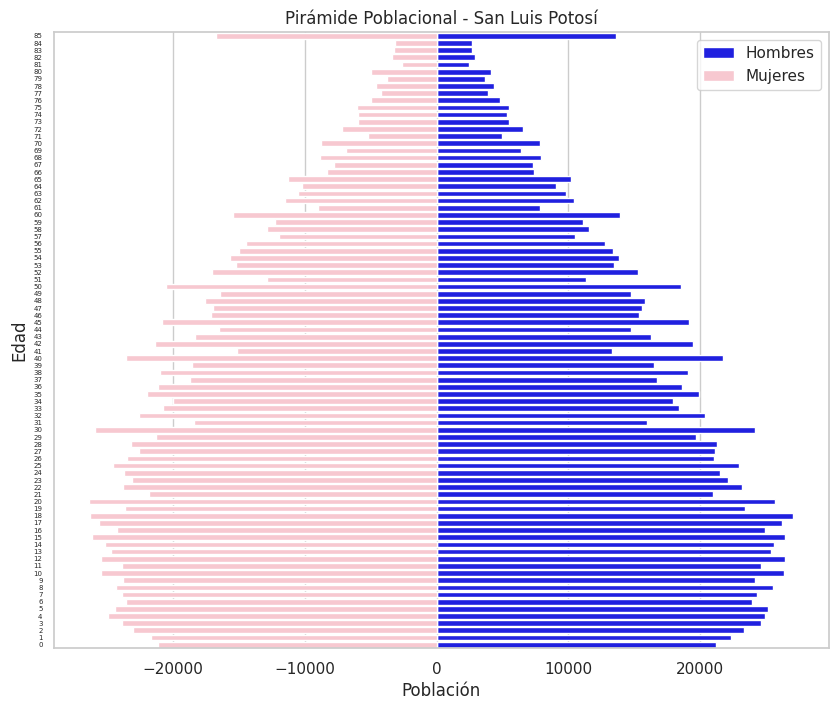

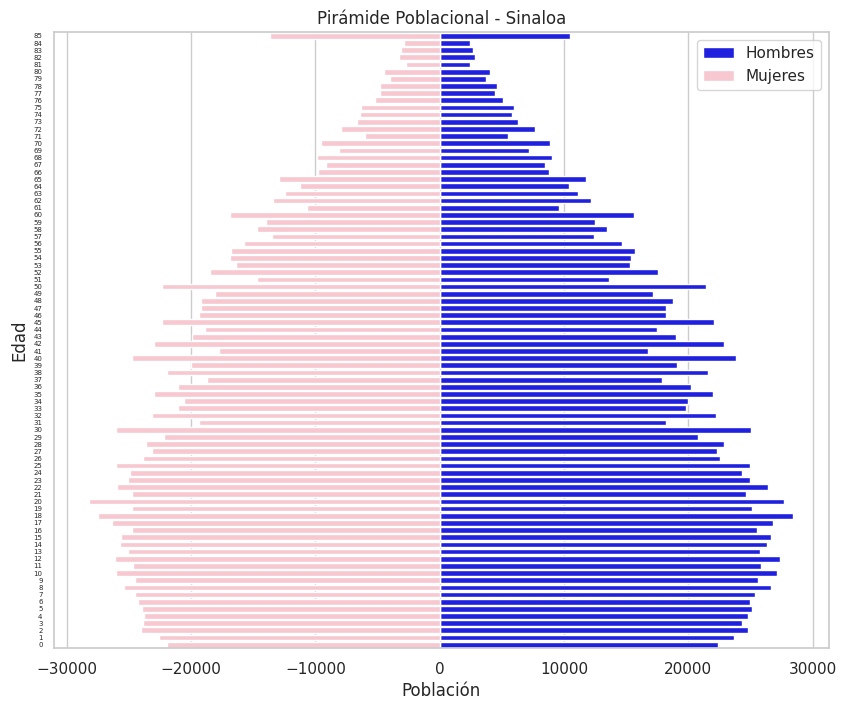

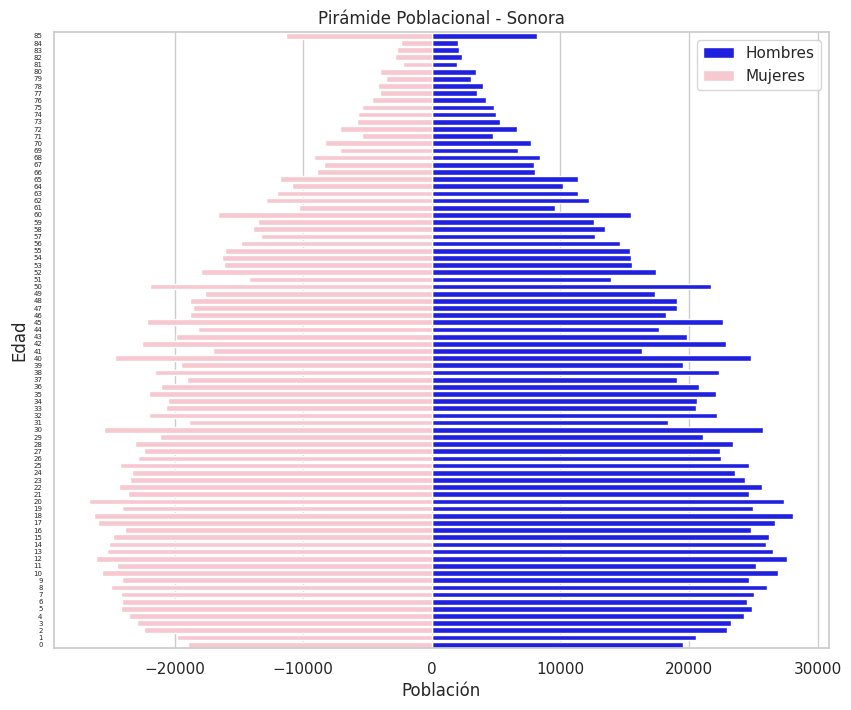

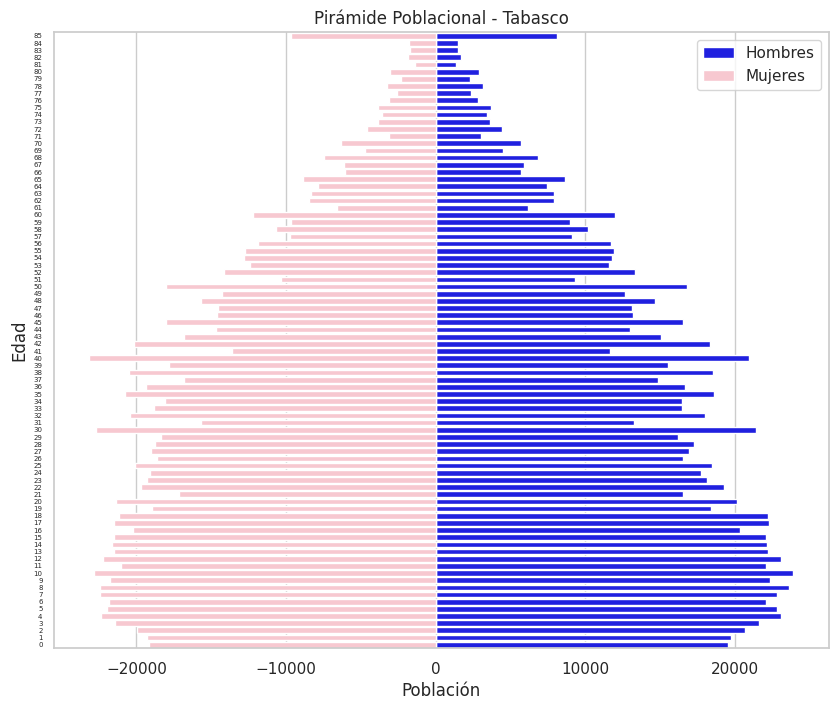

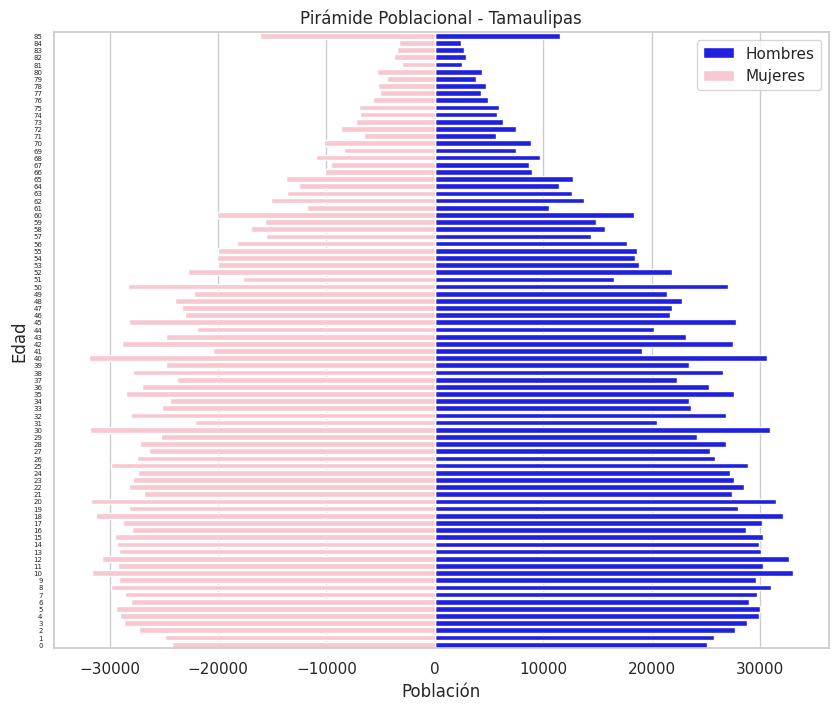

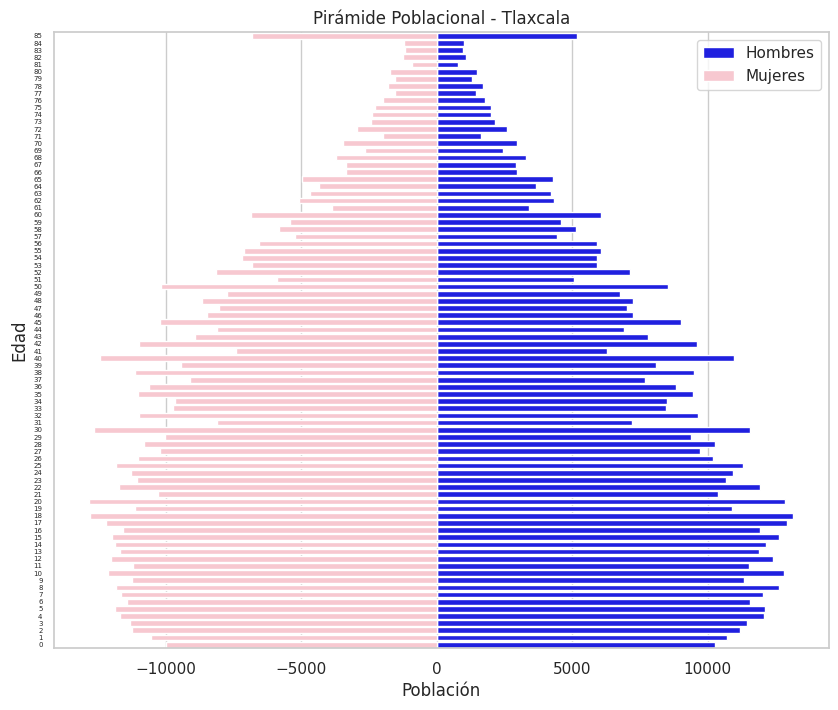

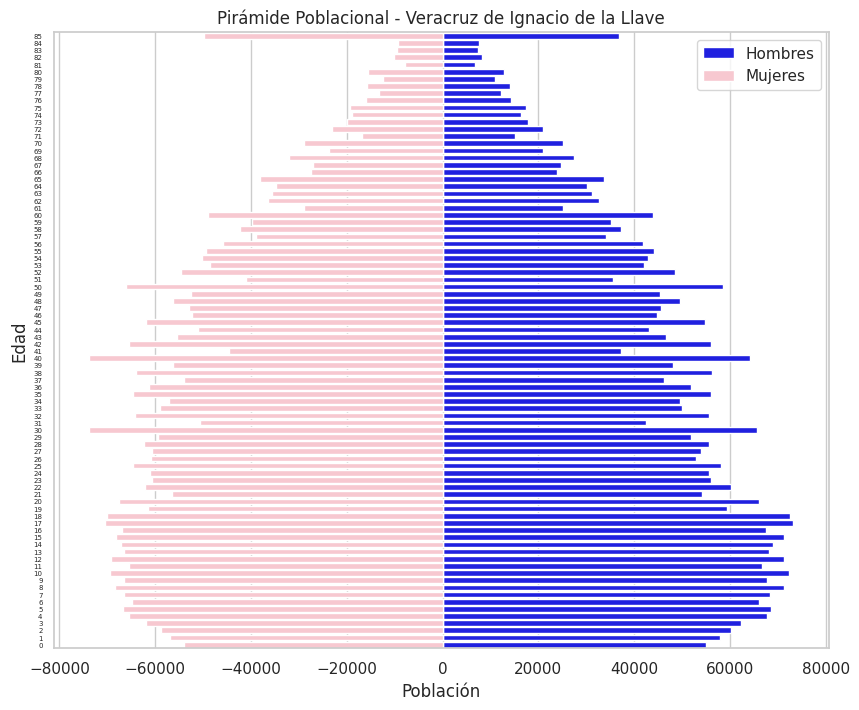

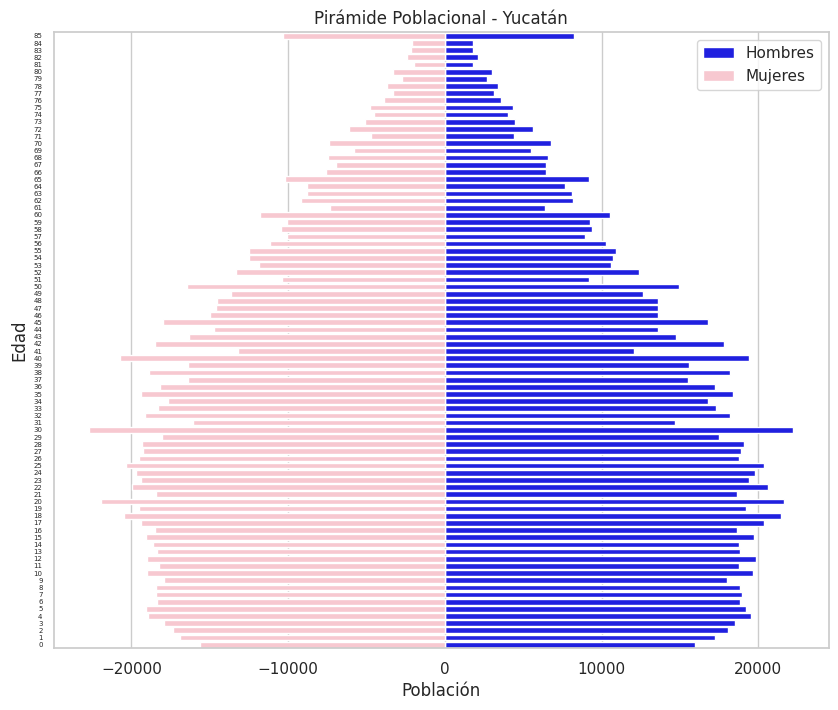

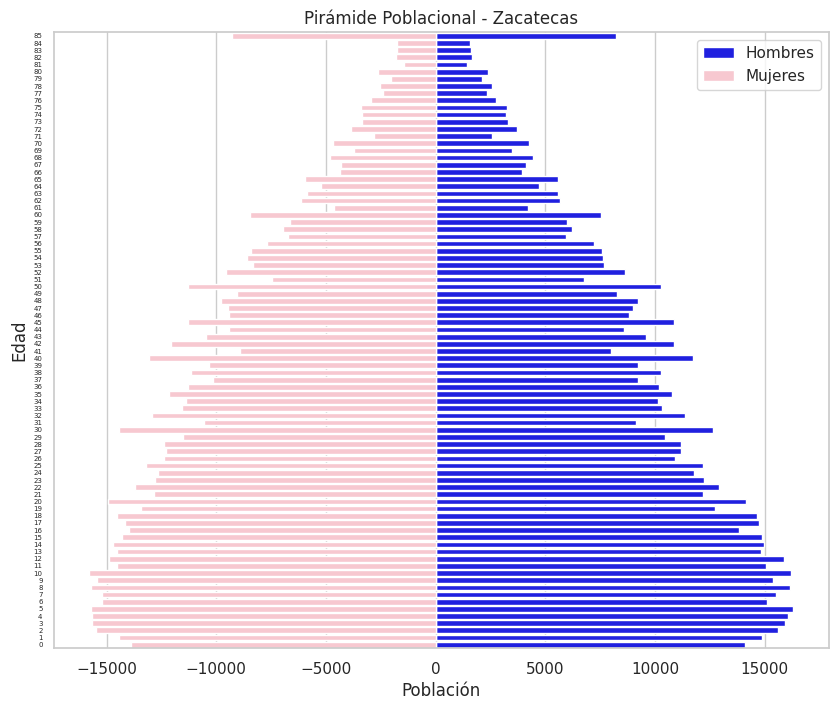

In [ ]:
estados = pob_estado['Entidad'].unique()

for estado in estados:
    data_estado = pob_estado[pob_estado['Entidad'] == estado]

    # Crear una figura y ejes para cada estado
    fig, ax = plt.subplots(figsize=(10, 8))

    # Crear barras apiladas para hombres y mujeres
    sns.barplot(x='hombres', y='edad', data=data_estado, color='blue', label='Hombres', orient='h')
    sns.barplot(x=-data_estado['mujeres'], y='edad', data=data_estado, color='pink', label='Mujeres', orient='h')

    # Configuraciones adicionales
    ax.set_xlabel('Población')
    ax.set_ylabel('Edad')
    ax.set_title(f'Pirámide Poblacional - {estado}')
    ax.legend()

    # Invertir el orden del eje y para que la edad más alta esté arriba
    ax.invert_yaxis()
    ax.tick_params(axis='y', labelsize=5, rotation=0, pad=2)

    # Mostrar la pirámide poblacional para cada estado
    plt.show()

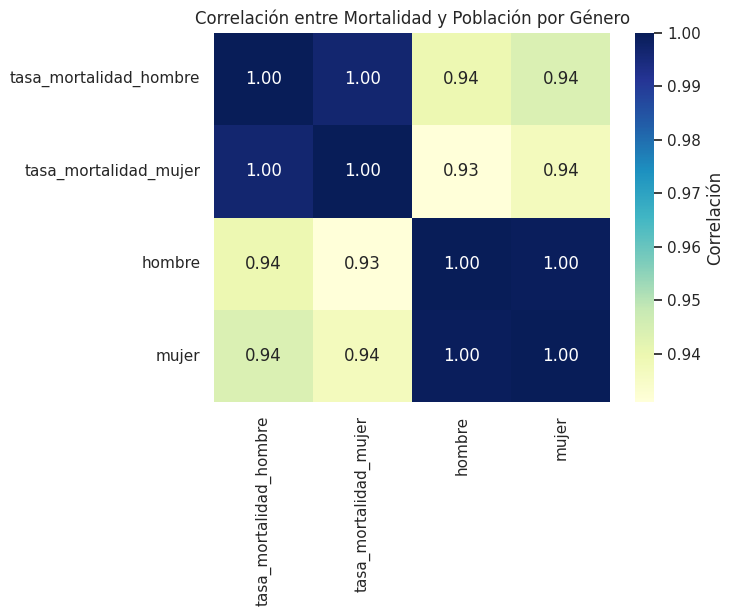

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que "tasa_mortalidad_hombre", "tasa_mortalidad_mujer", "hombre" y "mujer" son columnas en los DataFrames mort_general y pob_general
correlation_data = mort_general[["tasa_mortalidad_hombre", "tasa_mortalidad_mujer"]].join(pob_general[["hombre", "mujer"]])

# Calcular la correlación
cor = correlation_data.corr()

# Crear un mapa de correlación
sns.heatmap(cor, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Correlación'})
plt.title('Correlación entre Mortalidad y Población por Género')
plt.show()
